In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

plt.rcParams['font.family'] ='sans-serif'#使用するフォント
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 0.5#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 64 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ

In [56]:
def nameEditor(name):
    return name.replace('__', '_').replace('v6','v1').replace('v7','v2').replace('v8','v3').split('_')

def plotISperEpoch(files_dir, ylim=0, xlim=0):
    plt.figure(figsize=(60,40))
    if ylim != 0: plt.ylim(0, ylim)
    if xlim != 0: plt.xlim(0, xlim)
    plt.xlabel('epoch')
    plt.ylabel('Insecptin Score')
    [dataset_name, comp_name] = files_dir.split('/')[2:4]
    plt.title('Evaluation for %s: %s type' %(dataset_name, comp_name))
    for file in sorted(glob.glob(os.path.join(files_dir, '*'))):
        file_s = nameEditor(os.path.basename(file))
        with open(file, 'r') as f:
            line = f.readline()   
            epoch = []
            is_score = []
            max_score = []
            is_max = 0
            while line:
                line = f.readline()
                if 'Inception Score' in line:
                    data_ = line.split(' :')
                    data = data_[1].replace('] [', ',').replace('[', '').replace(']', '')
                    epoch_data, is_data, max_data = data.split(',')
                    epoch.append(int(epoch_data.split(': ')[1].split('/')[0]))
                    is_score.append(float(is_data.split(': ')[1]))
                    max_score.append(float(max_data.split(': ')[1]))
            is_max = max_score[len(max_score)-1]
            if 'WGAN' in file_s[1]:
                plt.plot(epoch, is_score, linewidth = 5, alpha=0.8, label=file_s[1:3], color='red')
            else:
                plt.plot(epoch, is_score, linewidth = 5, alpha=0.8, label=file_s[1:3])
            plt.legend(loc='best', borderaxespad=1, fontsize=64)
    plt.show()
    

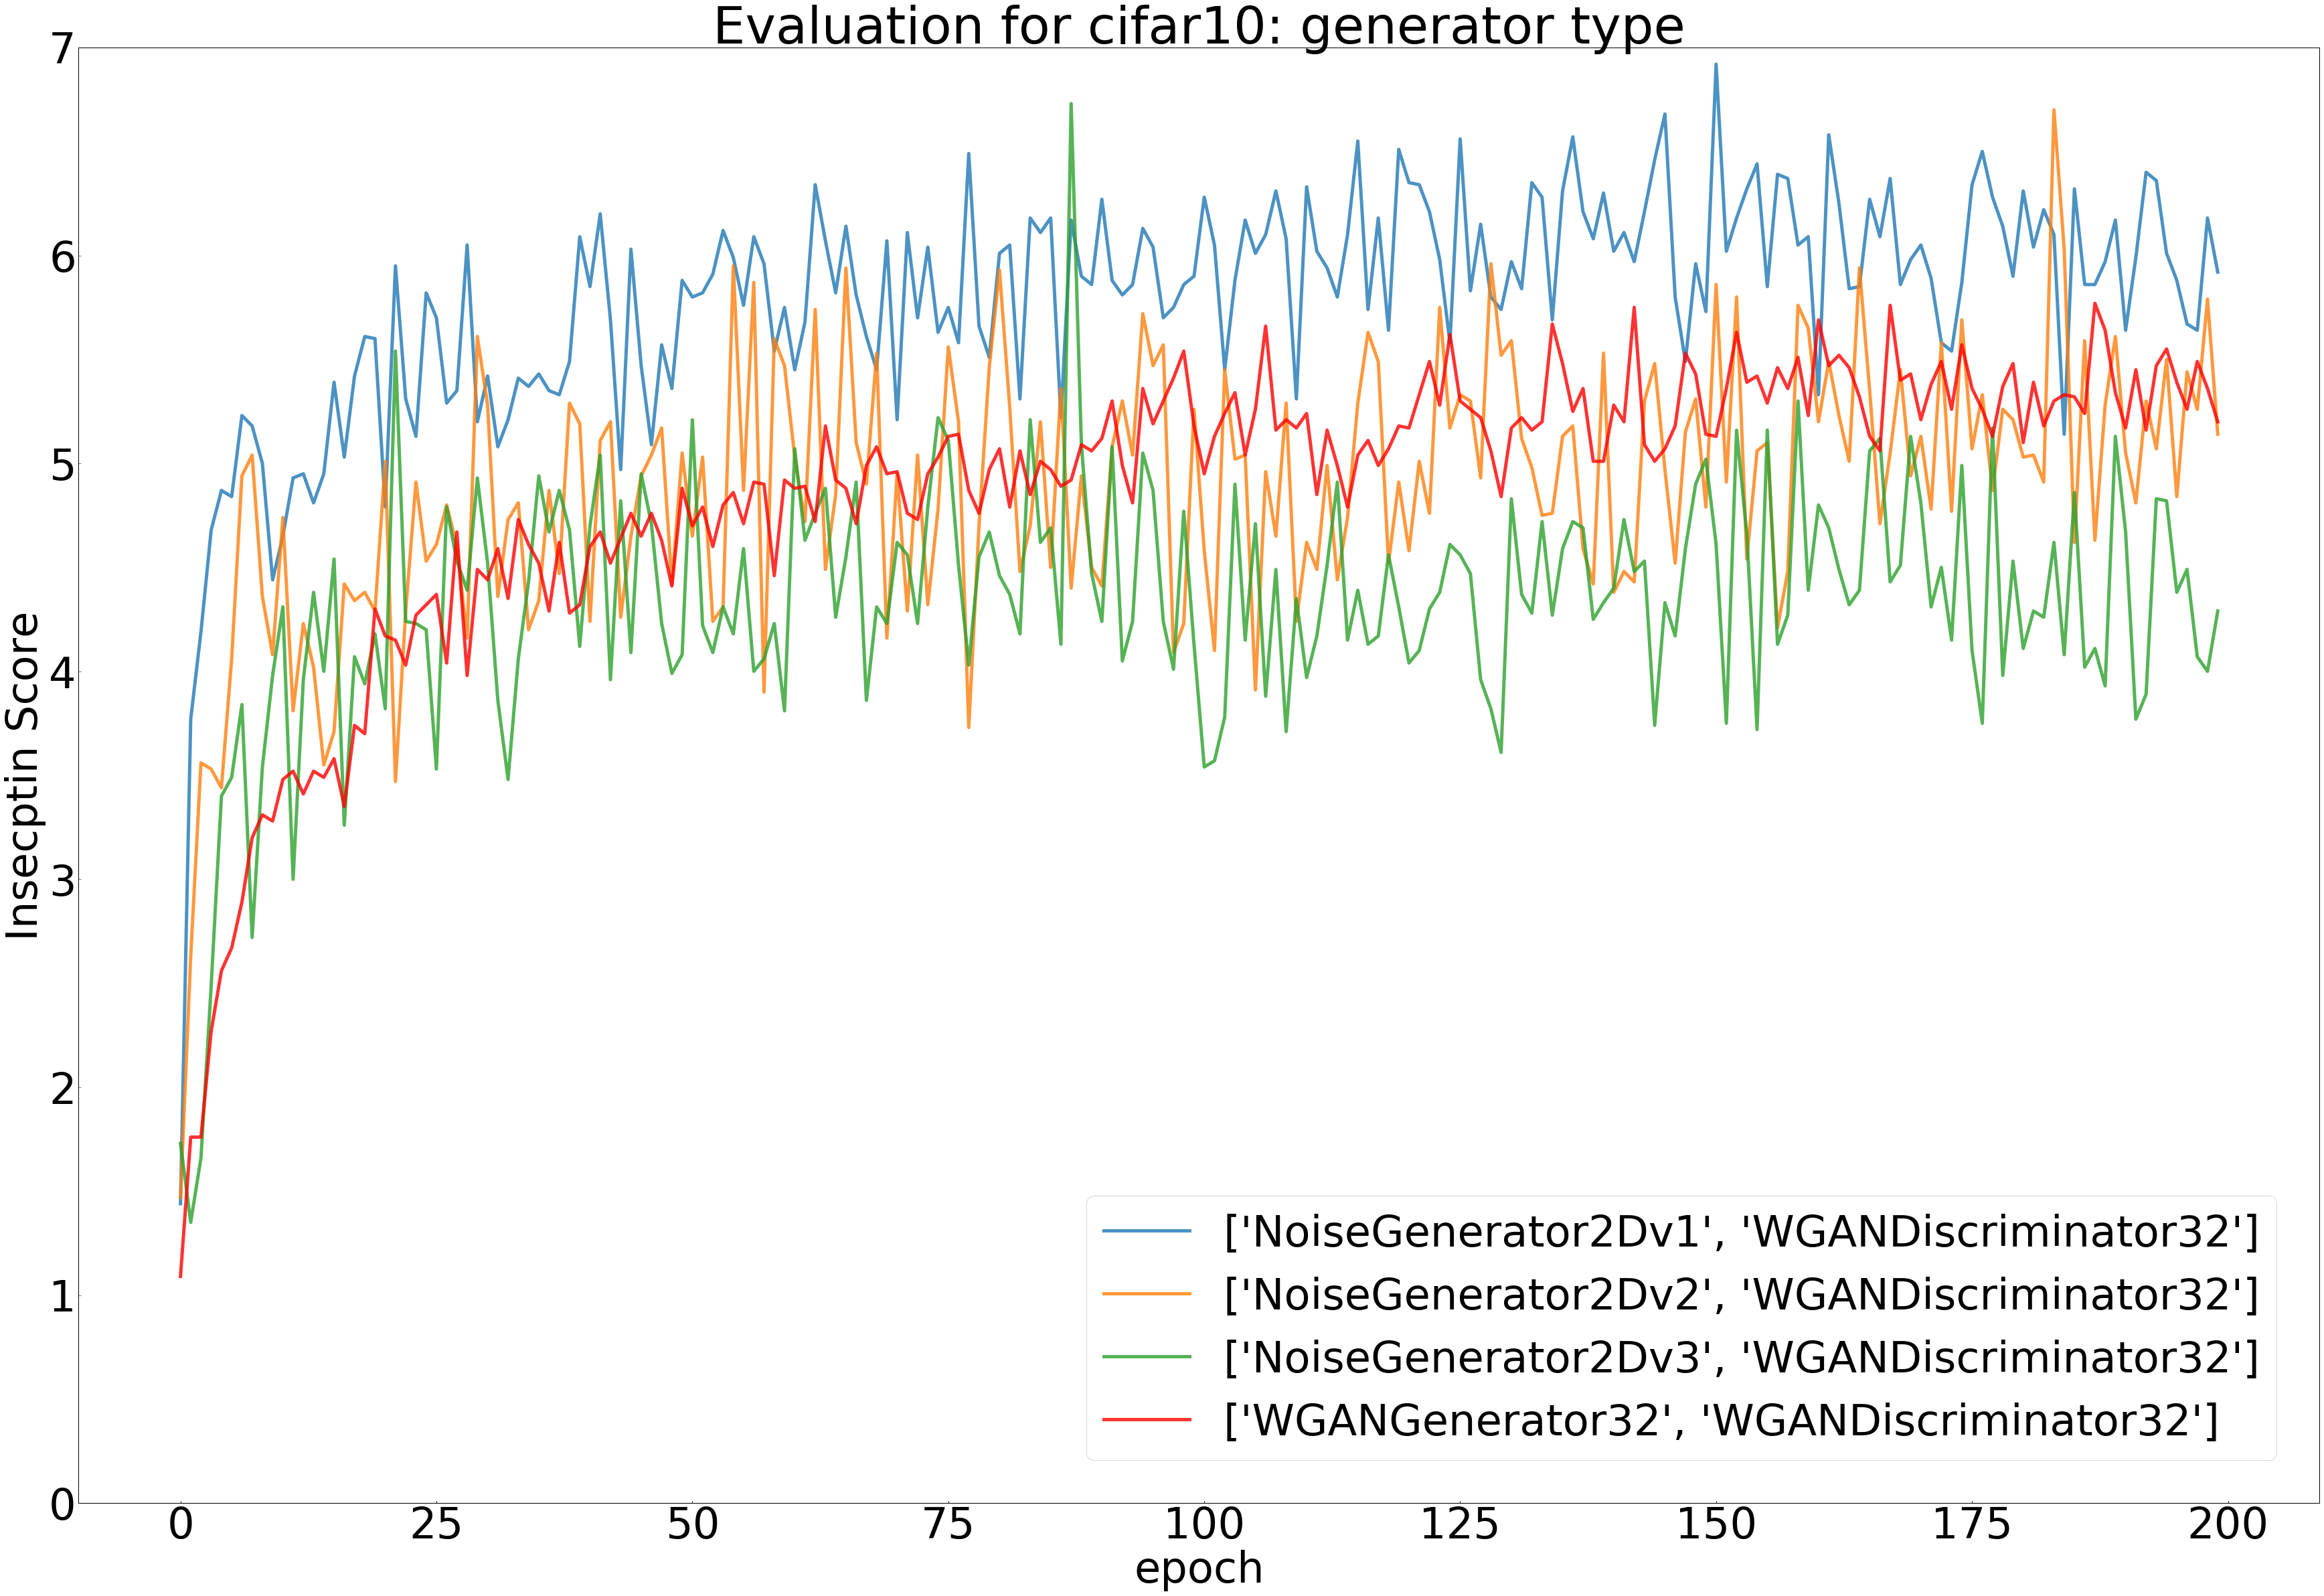

In [57]:
eval_files_dir = './evalIS/cifar10/generator'
plotISperEpoch(eval_files_dir, 7)

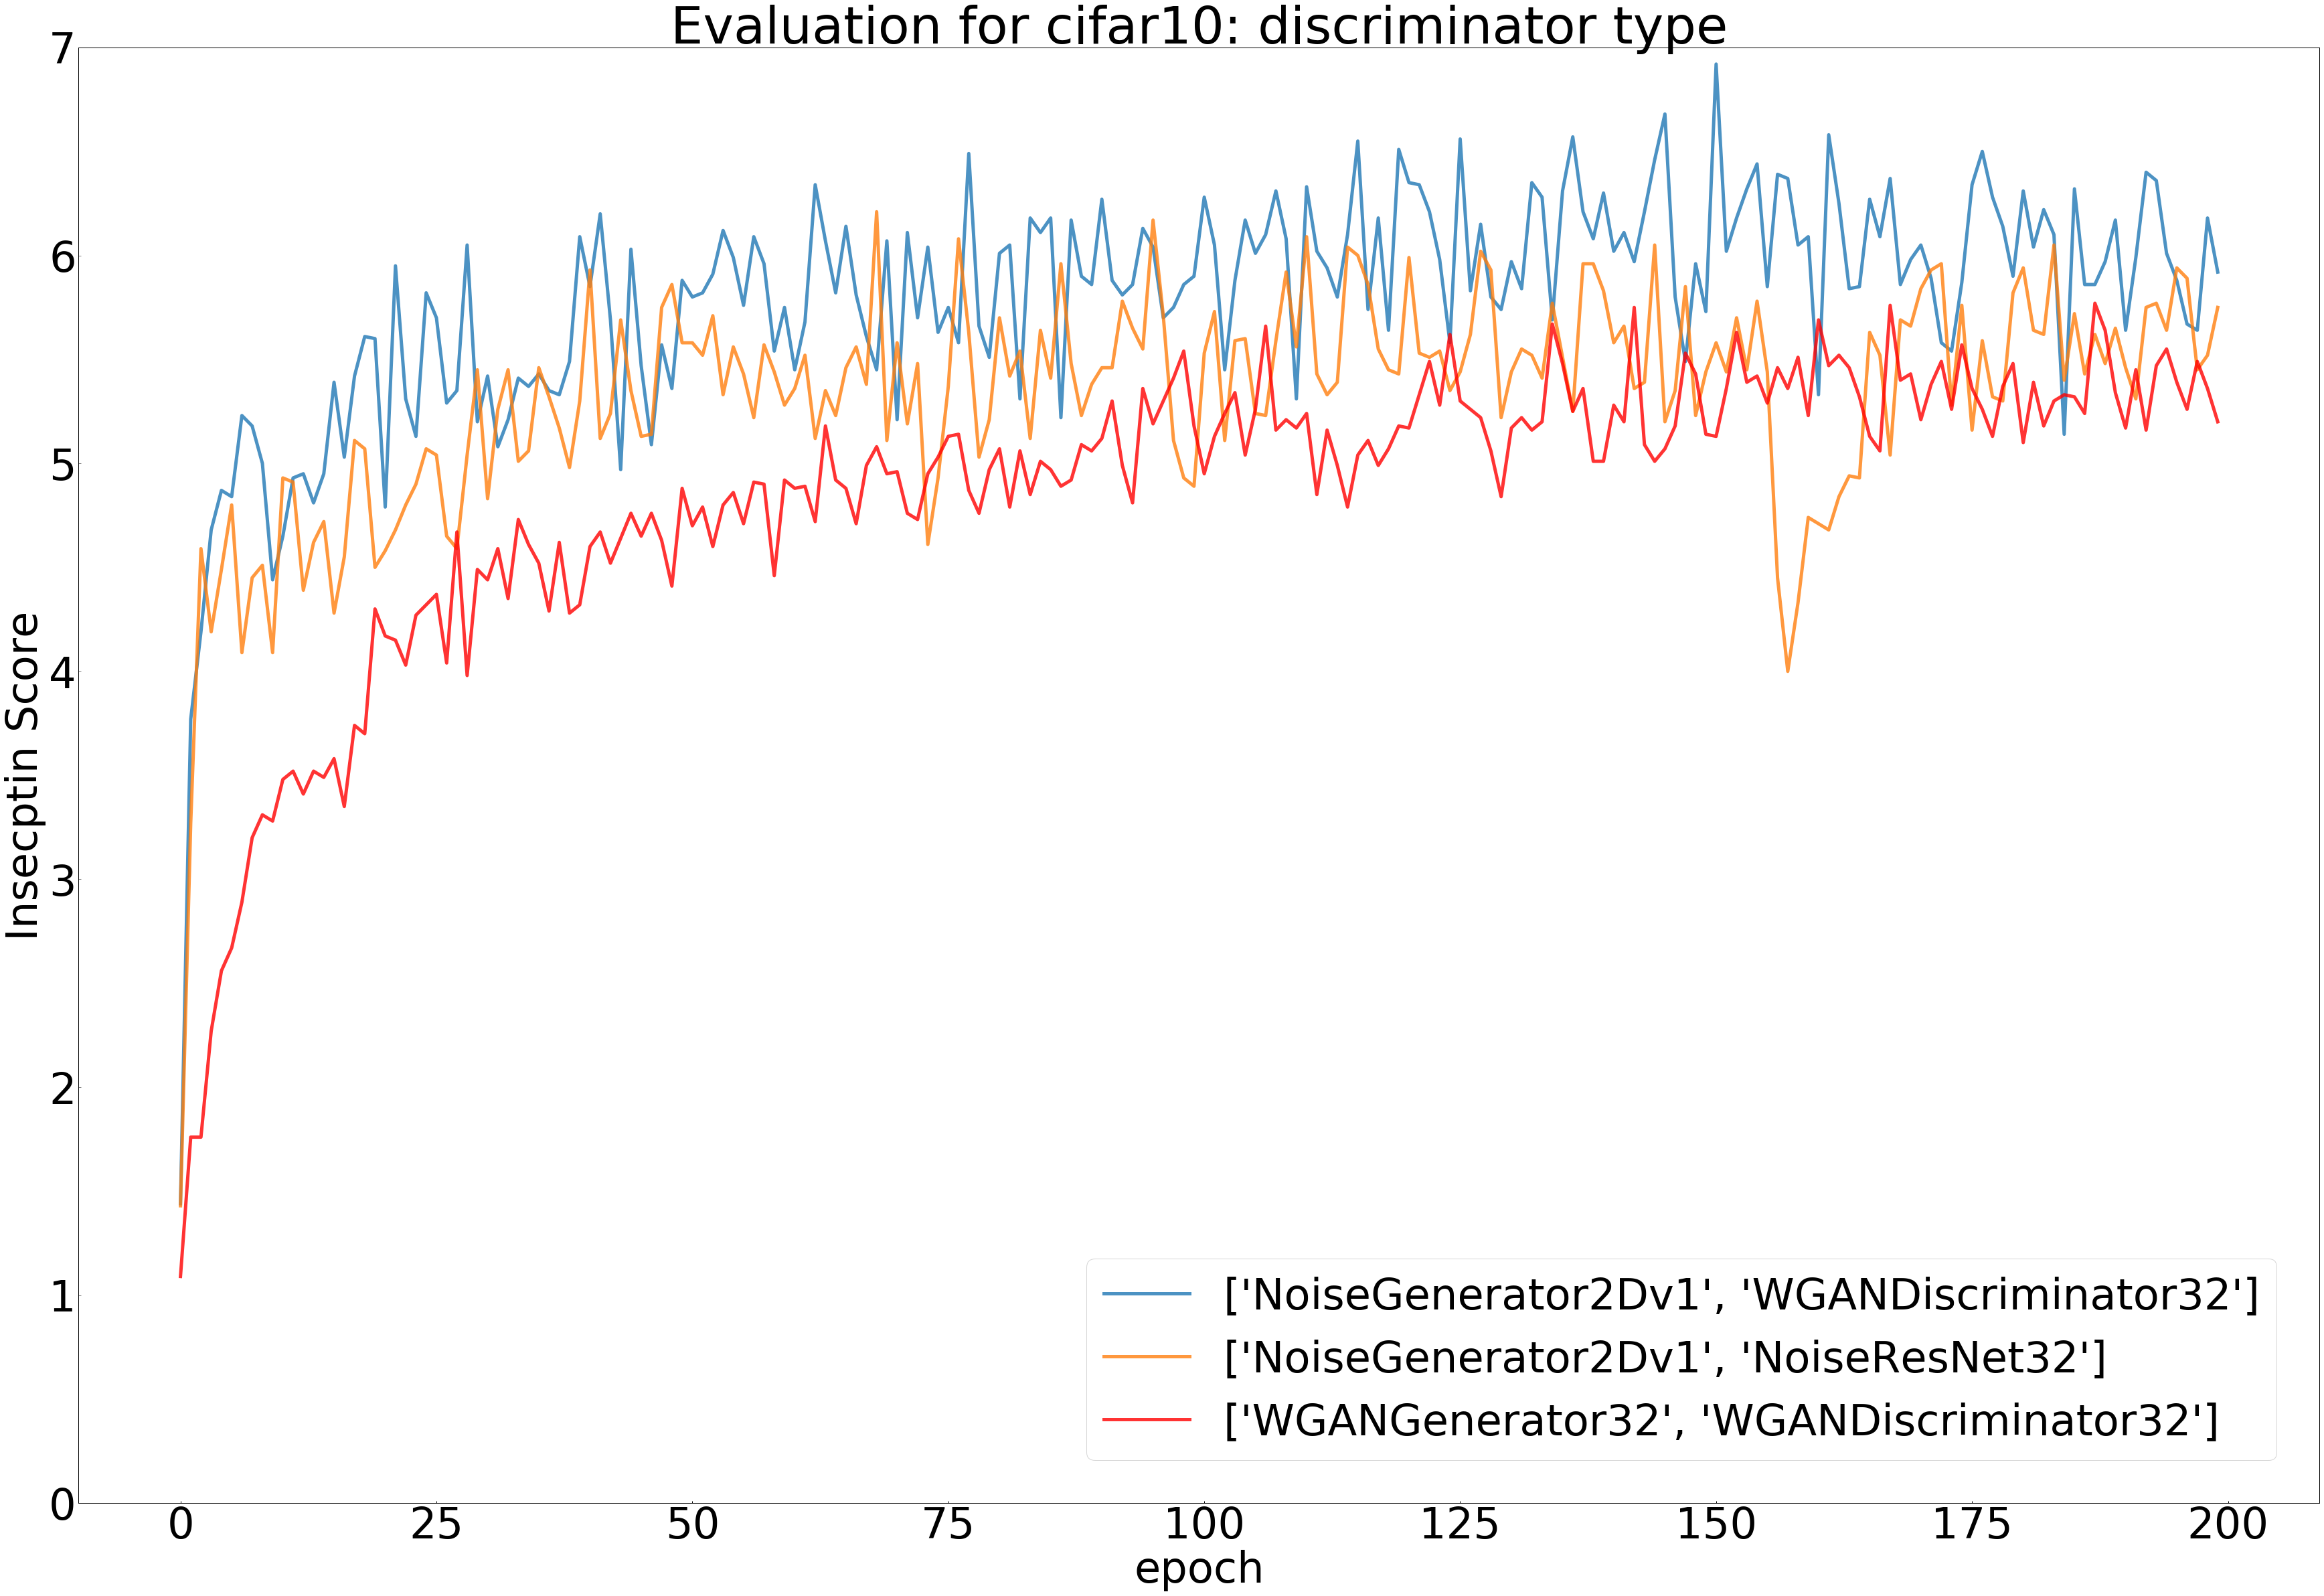

In [58]:
eval_files_dir = './evalIS/cifar10/discriminator'
plotISperEpoch(eval_files_dir, 7)

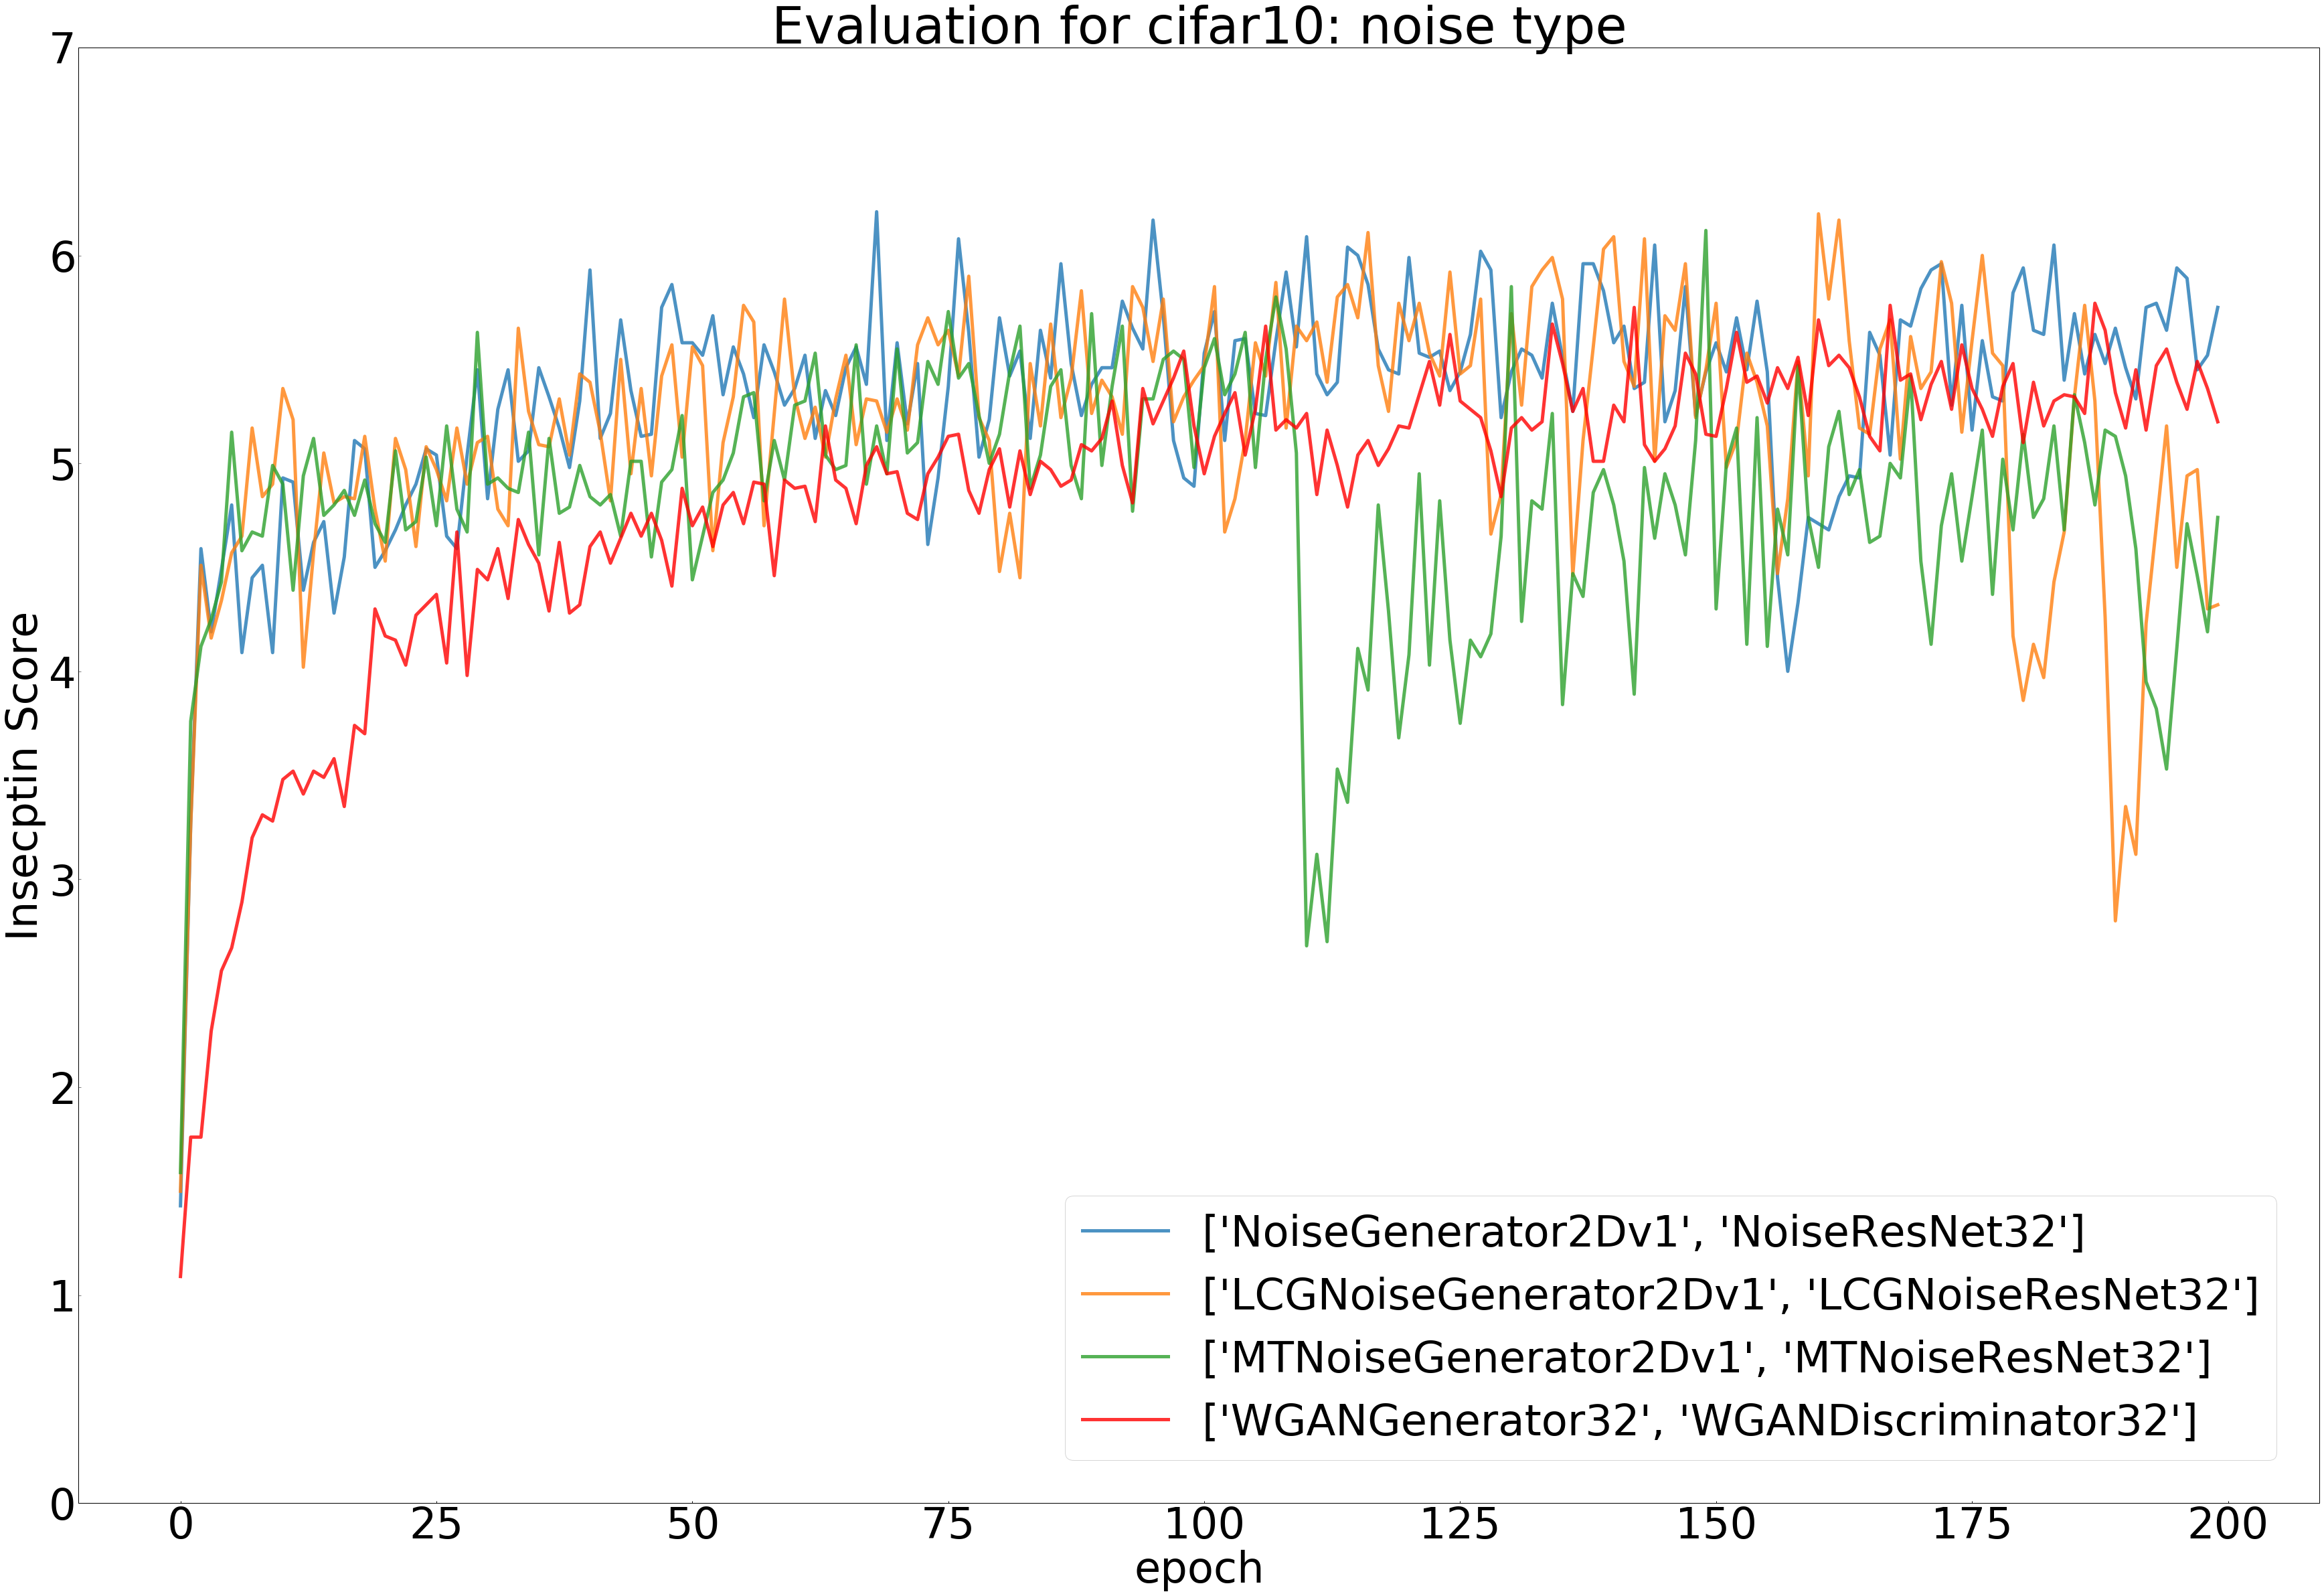

In [59]:
eval_files_dir = './evalIS/cifar10/noise'
plotISperEpoch(eval_files_dir, 7)

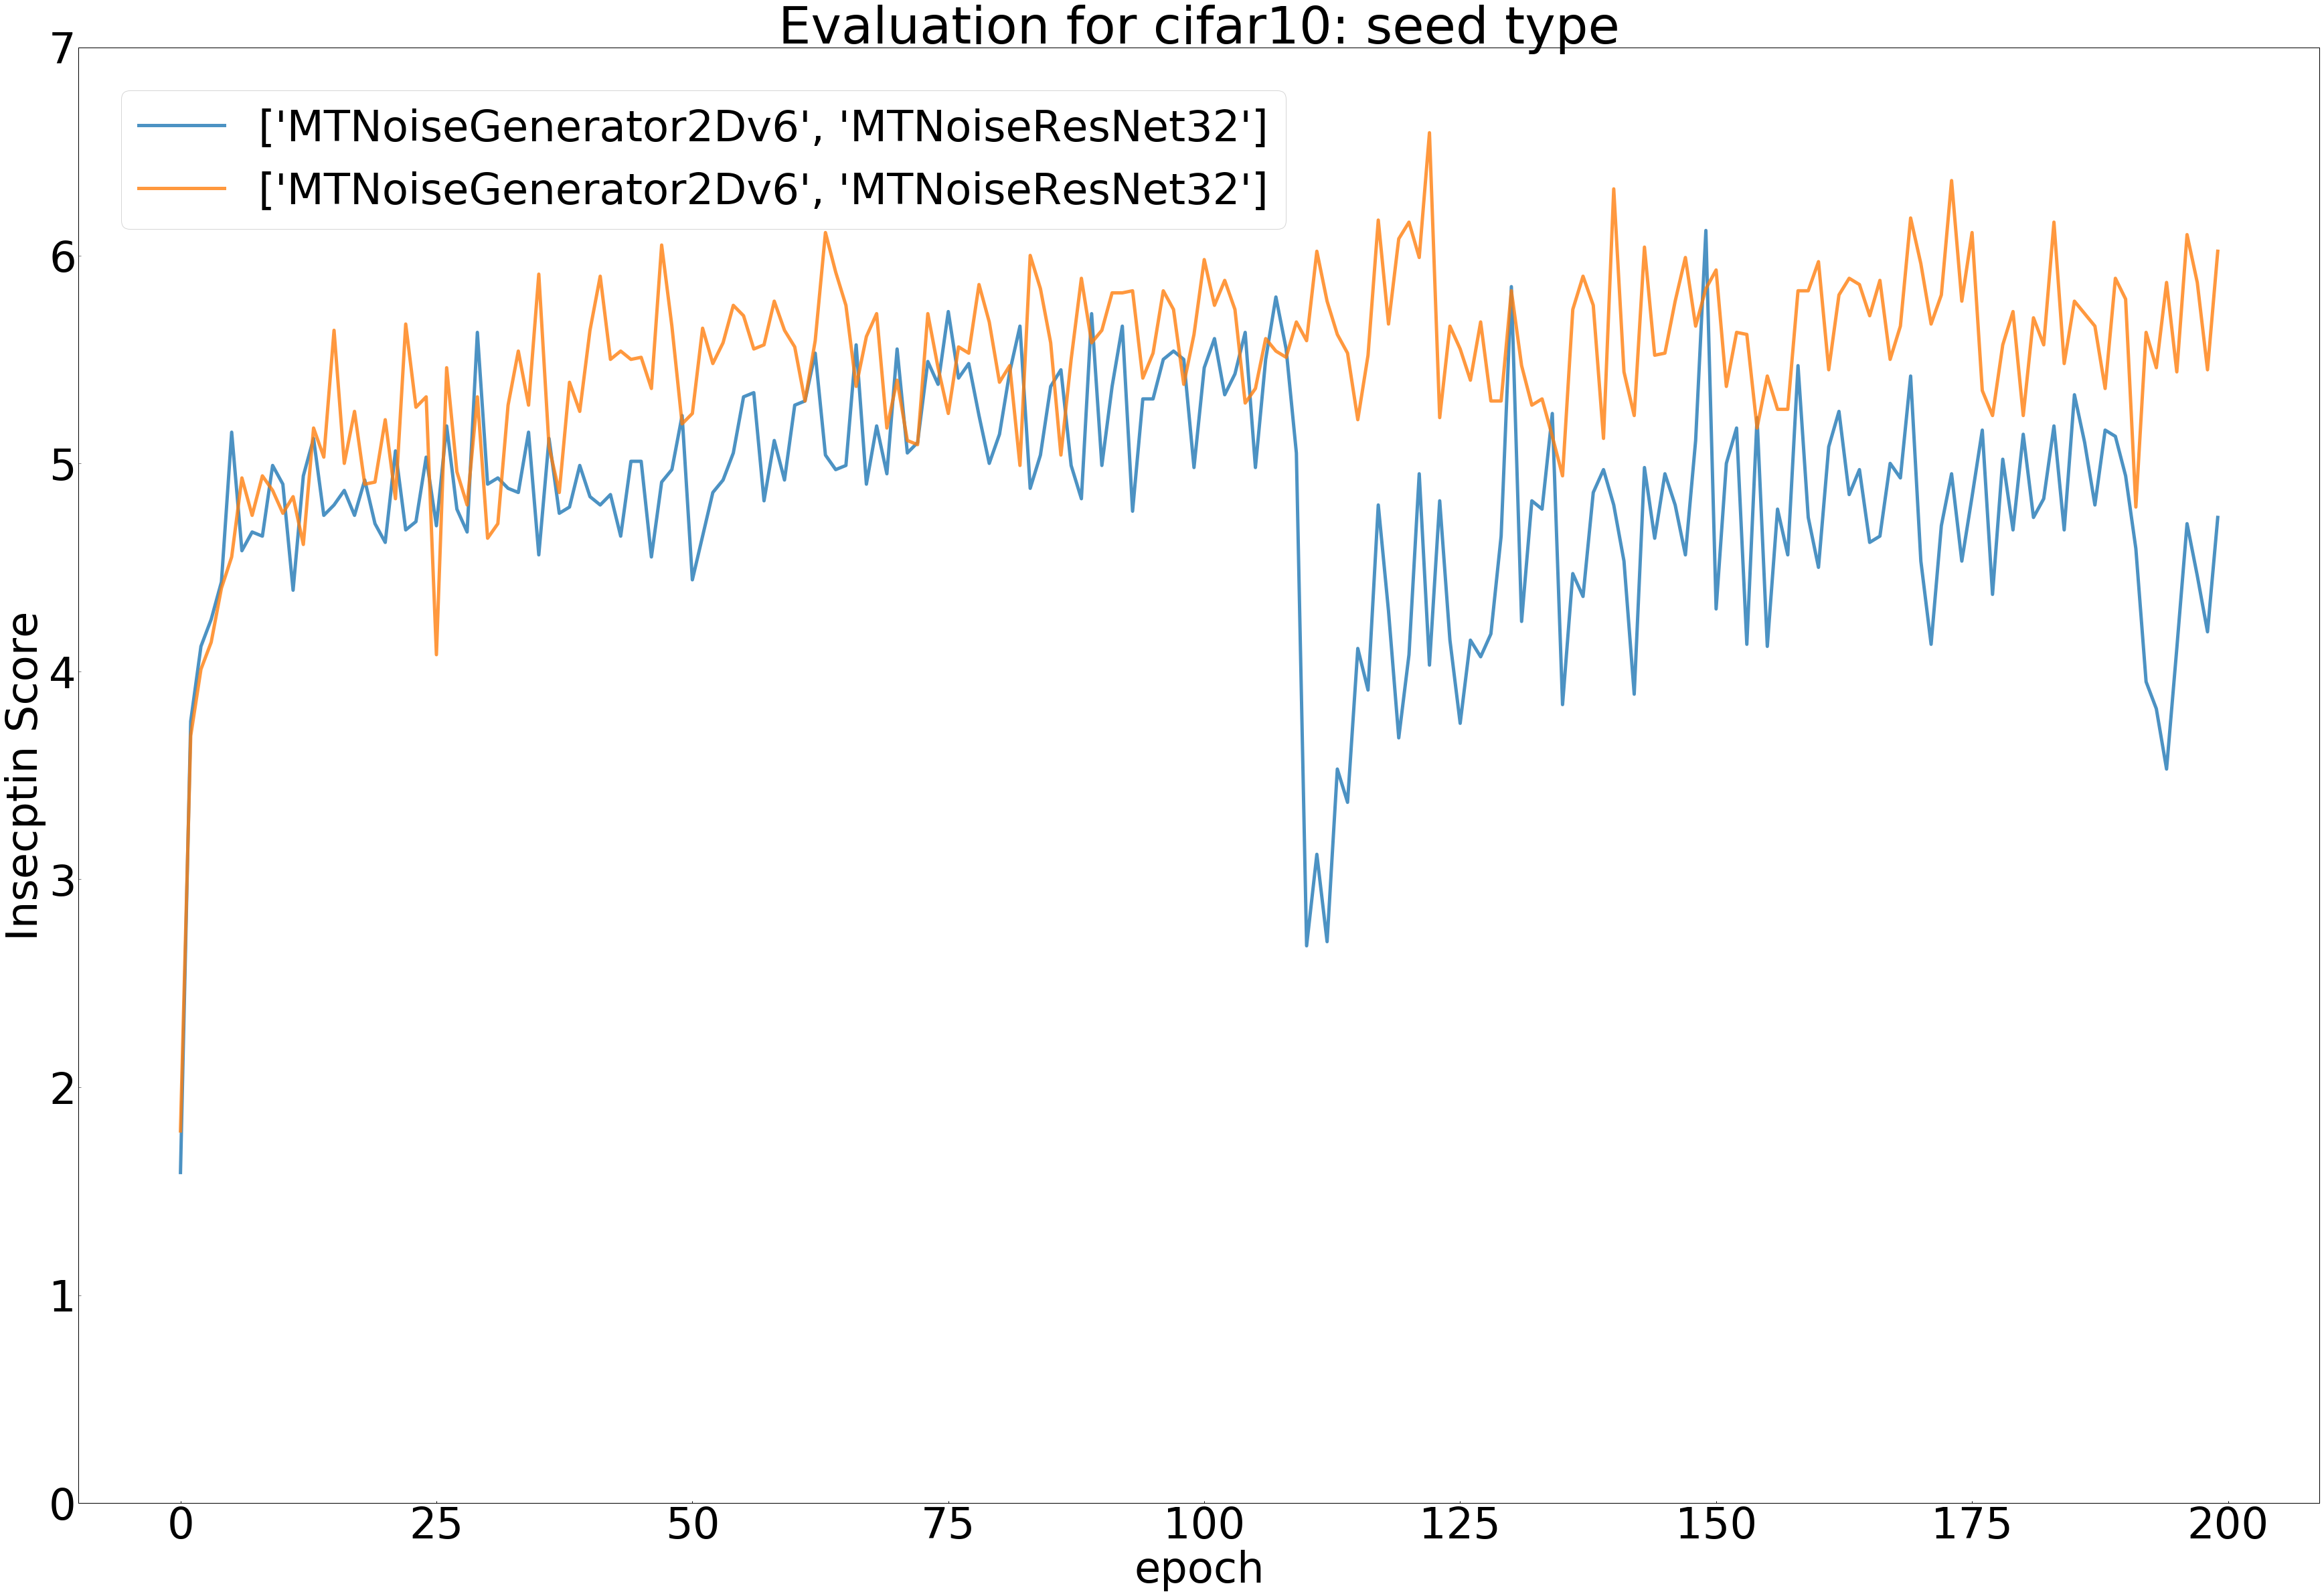

In [45]:
eval_files_dir = './evalIS/cifar10/seed'
plotISperEpoch(eval_files_dir, 7)

In [62]:
def plotISperIter(files_dir, ylim=0, xlim=0):
    plt.figure(figsize=(60,40))
    if ylim != 0: plt.ylim(0, ylim)
    if xlim != 0: plt.xlim(0, xlim)
    plt.xlabel('Iteration')
    plt.ylabel('Insecptin Score')
    [dataset_name, comp_name] = files_dir.split('/')[2:4]
    plt.title('Evaluation for %s: %s type' %(dataset_name, comp_name))
    for file in sorted(glob.glob(os.path.join(files_dir, '*'))):
        file_s = nameEditor(os.path.basename(file))
        if len(file_s) > 3:
            idx = file_s[0]
            g_name = file_s[1]
            d_name = file_s[2]
            dataset = file_s[3]
            with open(file, 'r') as f:
                line = f.readline()   
                epoch = []
                itert = []
                is_score = []
                max_score = []
                is_max = 0
                while line:
                    line = f.readline()
                    if 'Inception Score' in line:
                        data_ = line.split(' :')
                        data = data_[1].replace('] [', ',').replace('[', '').replace(']', '')
                        epoch_data, itert_data, is_data, max_data = data.split(',')
                        epoch.append(int(epoch_data.split(': ')[1].split('/')[0]))
                        itert.append(int(itert_data.split(': ')[1]))
                        is_score.append(float(is_data.split(': ')[1]))
                        max_score.append(float(max_data.split(': ')[1]))
                is_max = max_score[len(max_score)-1]
            if 'WGAN' in file_s[1]:
                plt.plot(itert, is_score, linewidth = 5, alpha=0.8, label=file_s[1:3], color='red')
            else:
                plt.plot(itert, is_score, linewidth = 5, alpha=0.8, label=file_s[1:3])
                plt.legend(loc='best', borderaxespad=1, fontsize=64)
    plt.show()
    

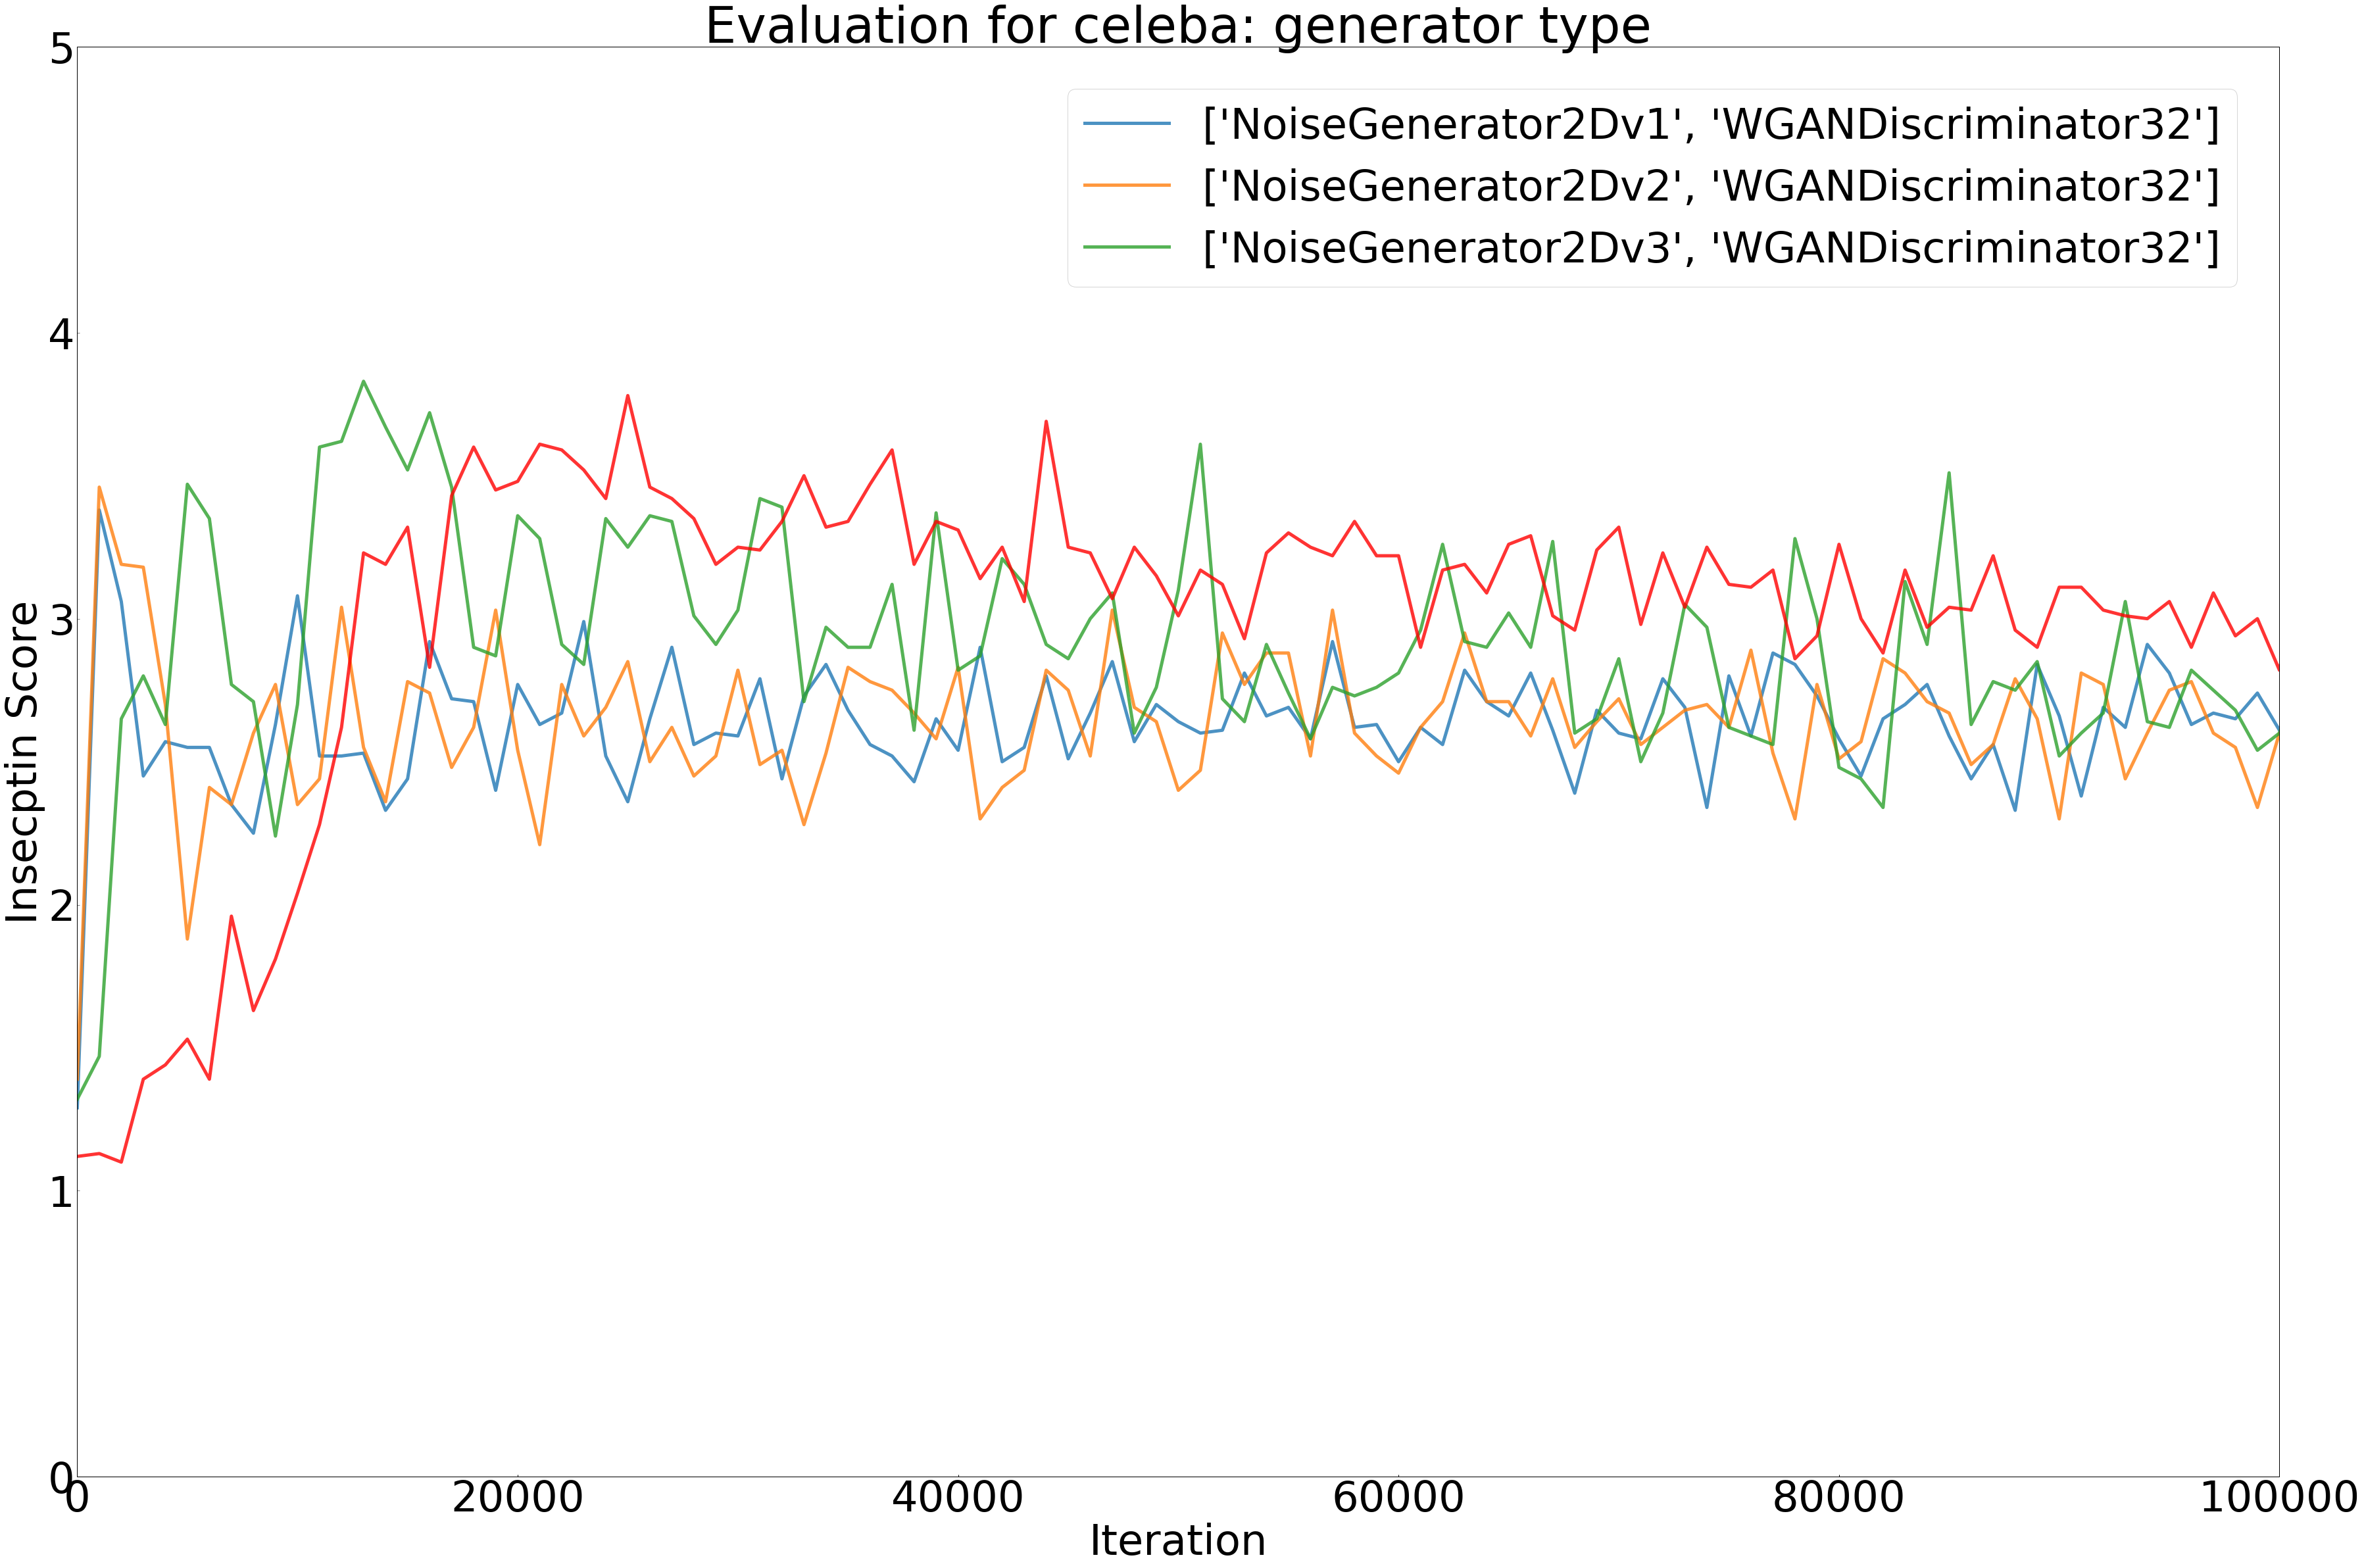

In [63]:
eval_files_dir = './evalIS/celeba/generator'
plotISperIter(eval_files_dir, ylim=5, xlim=100000)

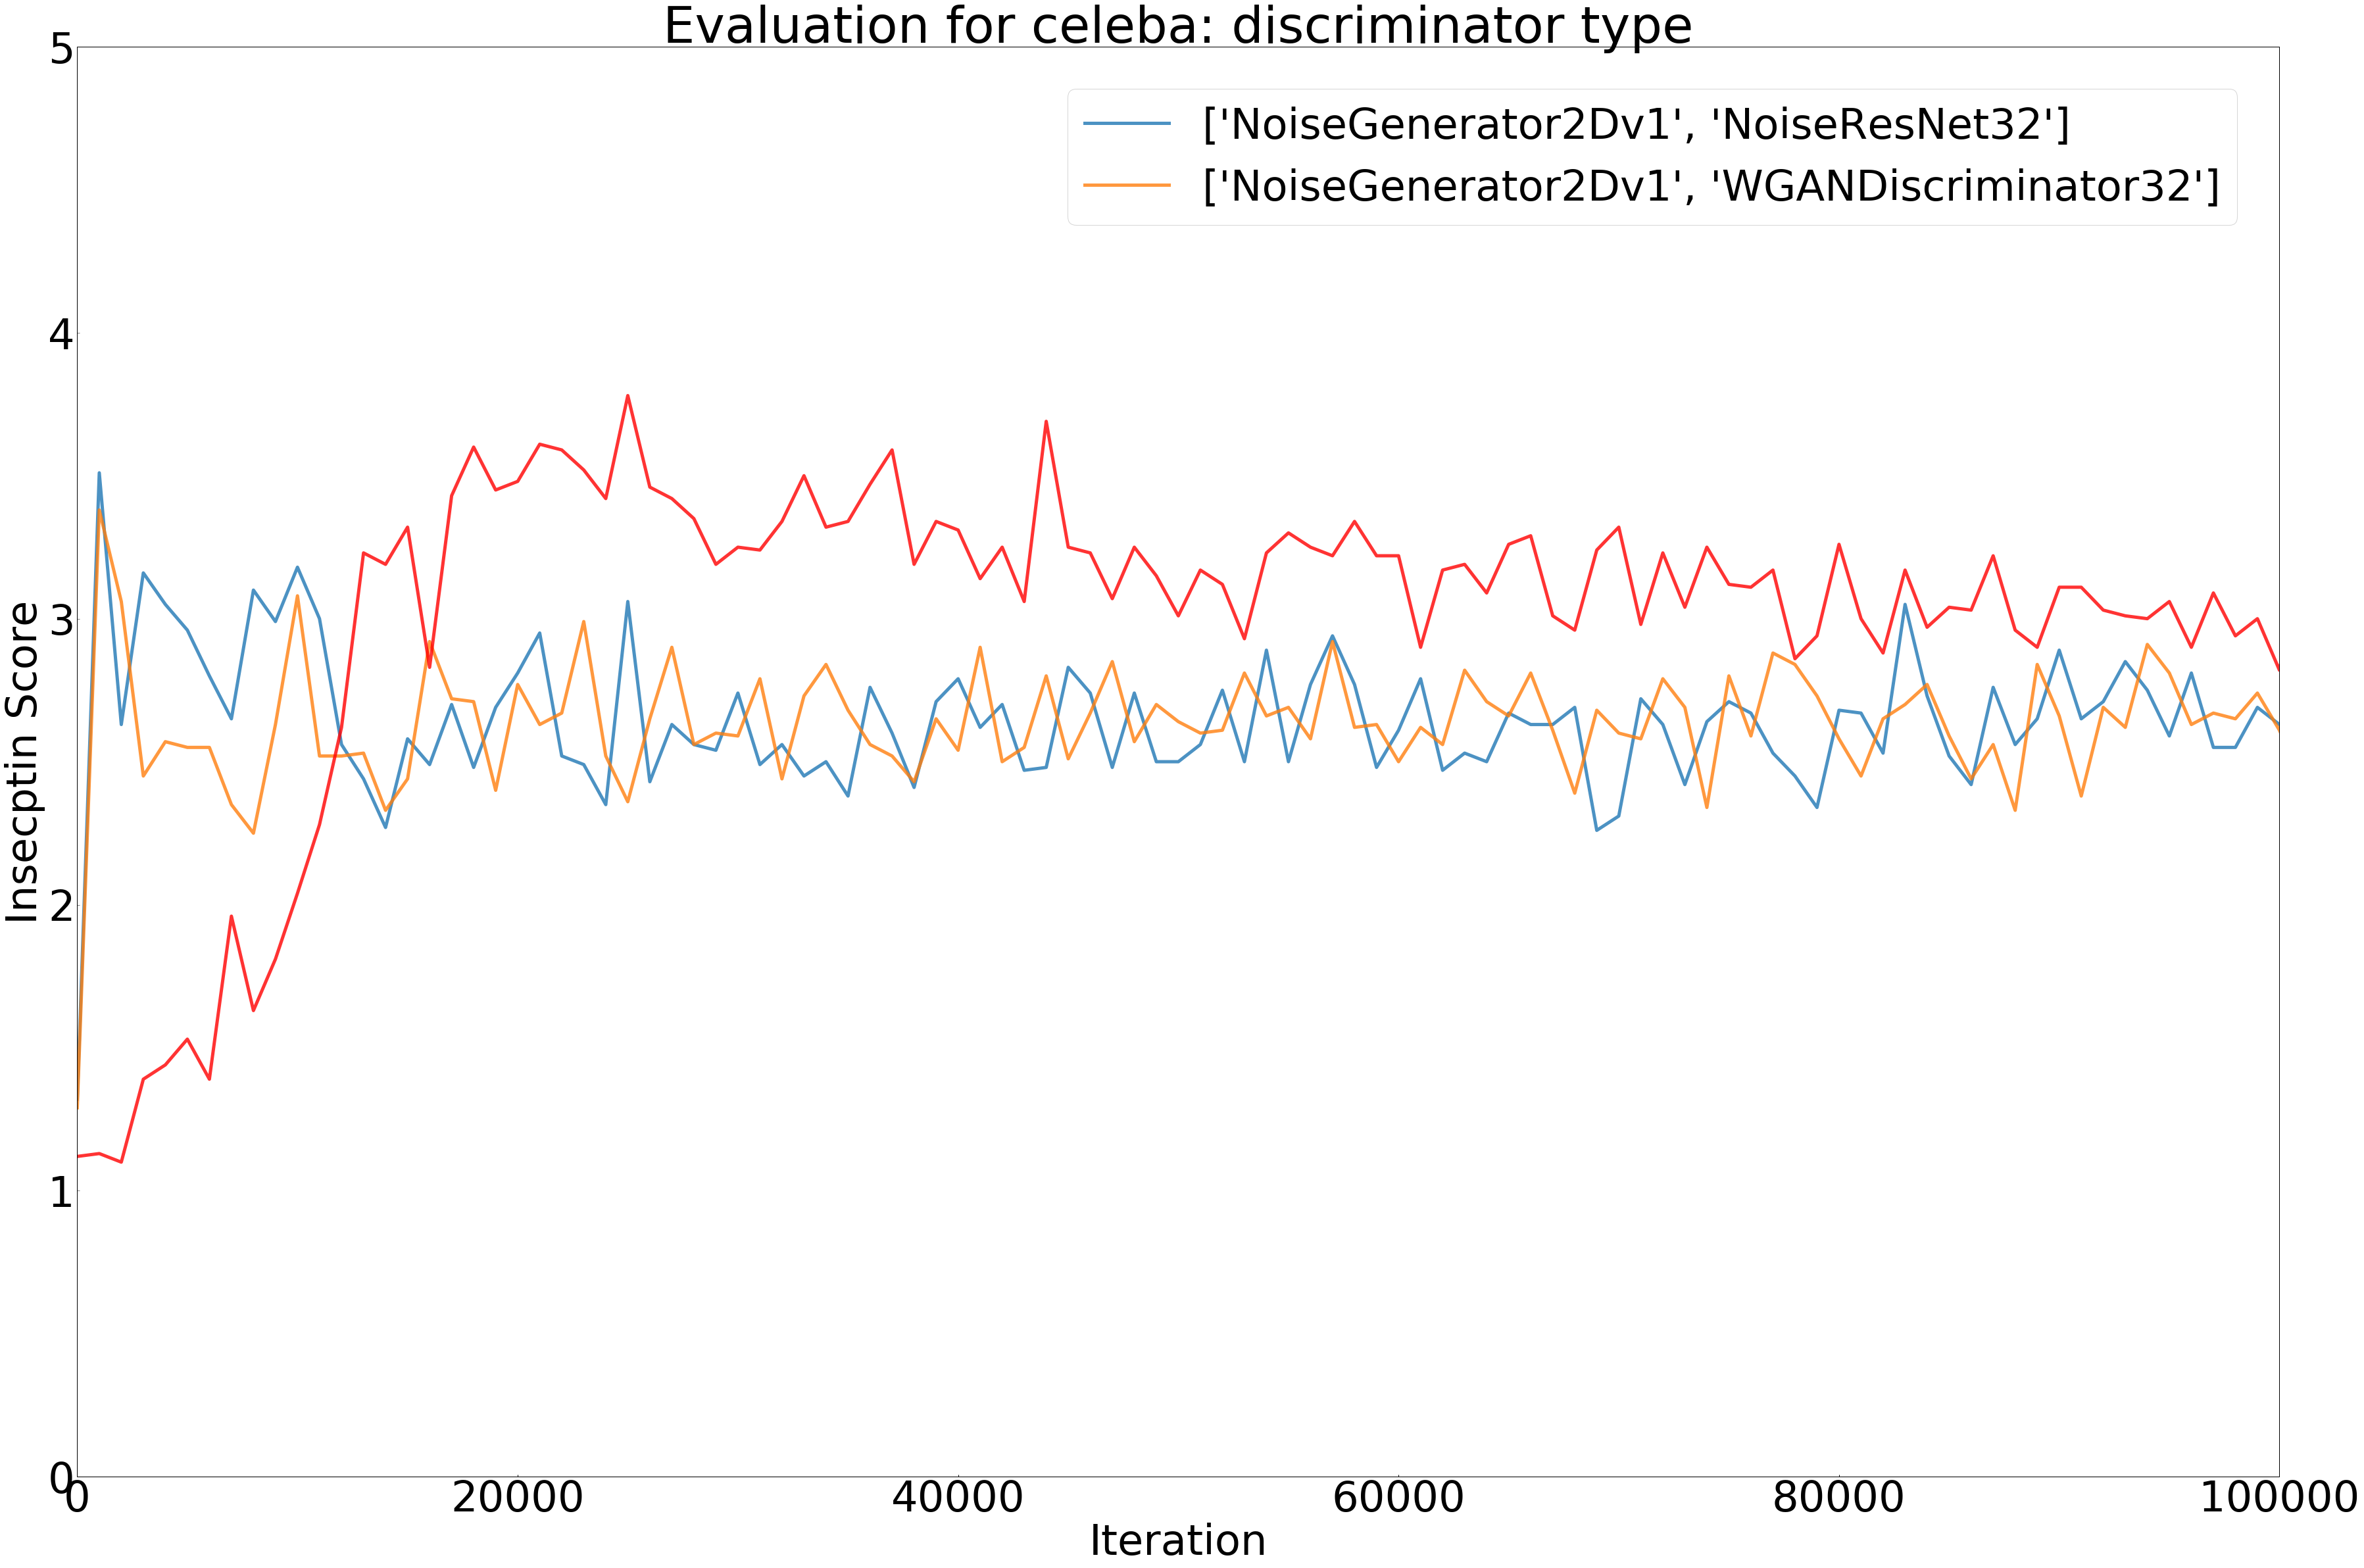

In [64]:
eval_files_dir = './evalIS/celeba/discriminator'
plotISperIter(eval_files_dir, ylim=5, xlim=100000)

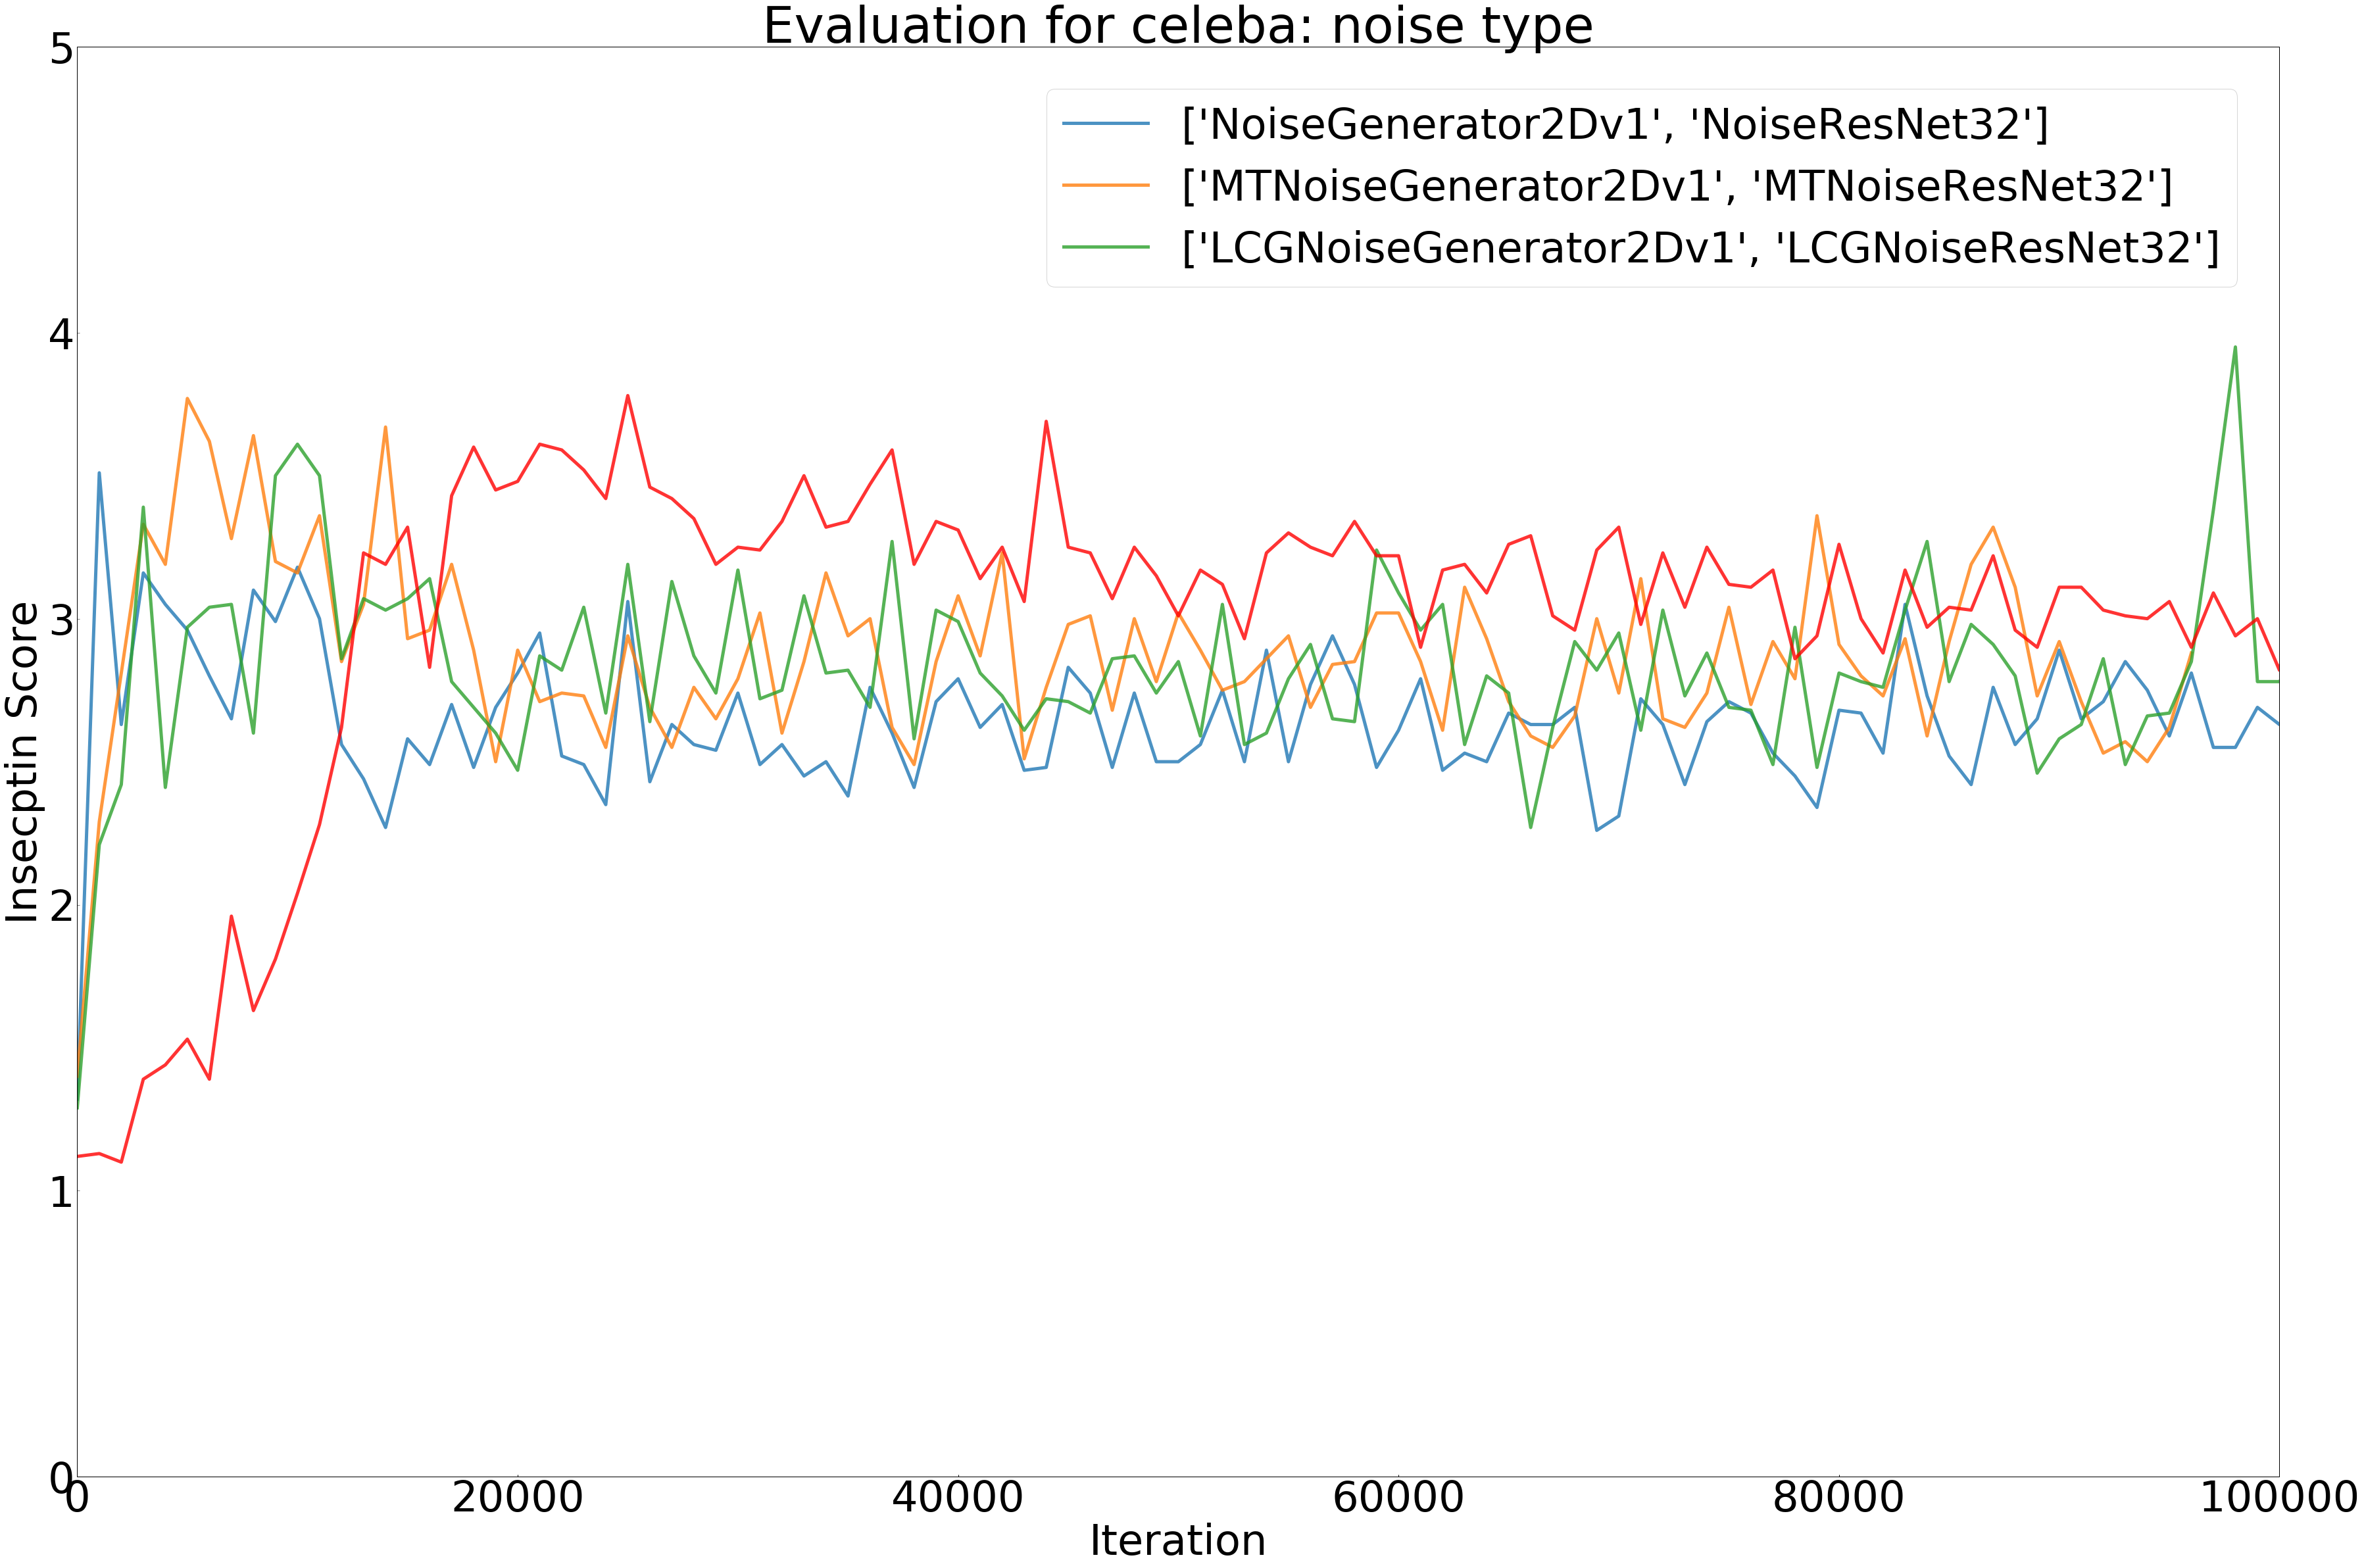

In [65]:
eval_files_dir = './evalIS/celeba/noise'
plotISperIter(eval_files_dir, ylim=5, xlim=100000)

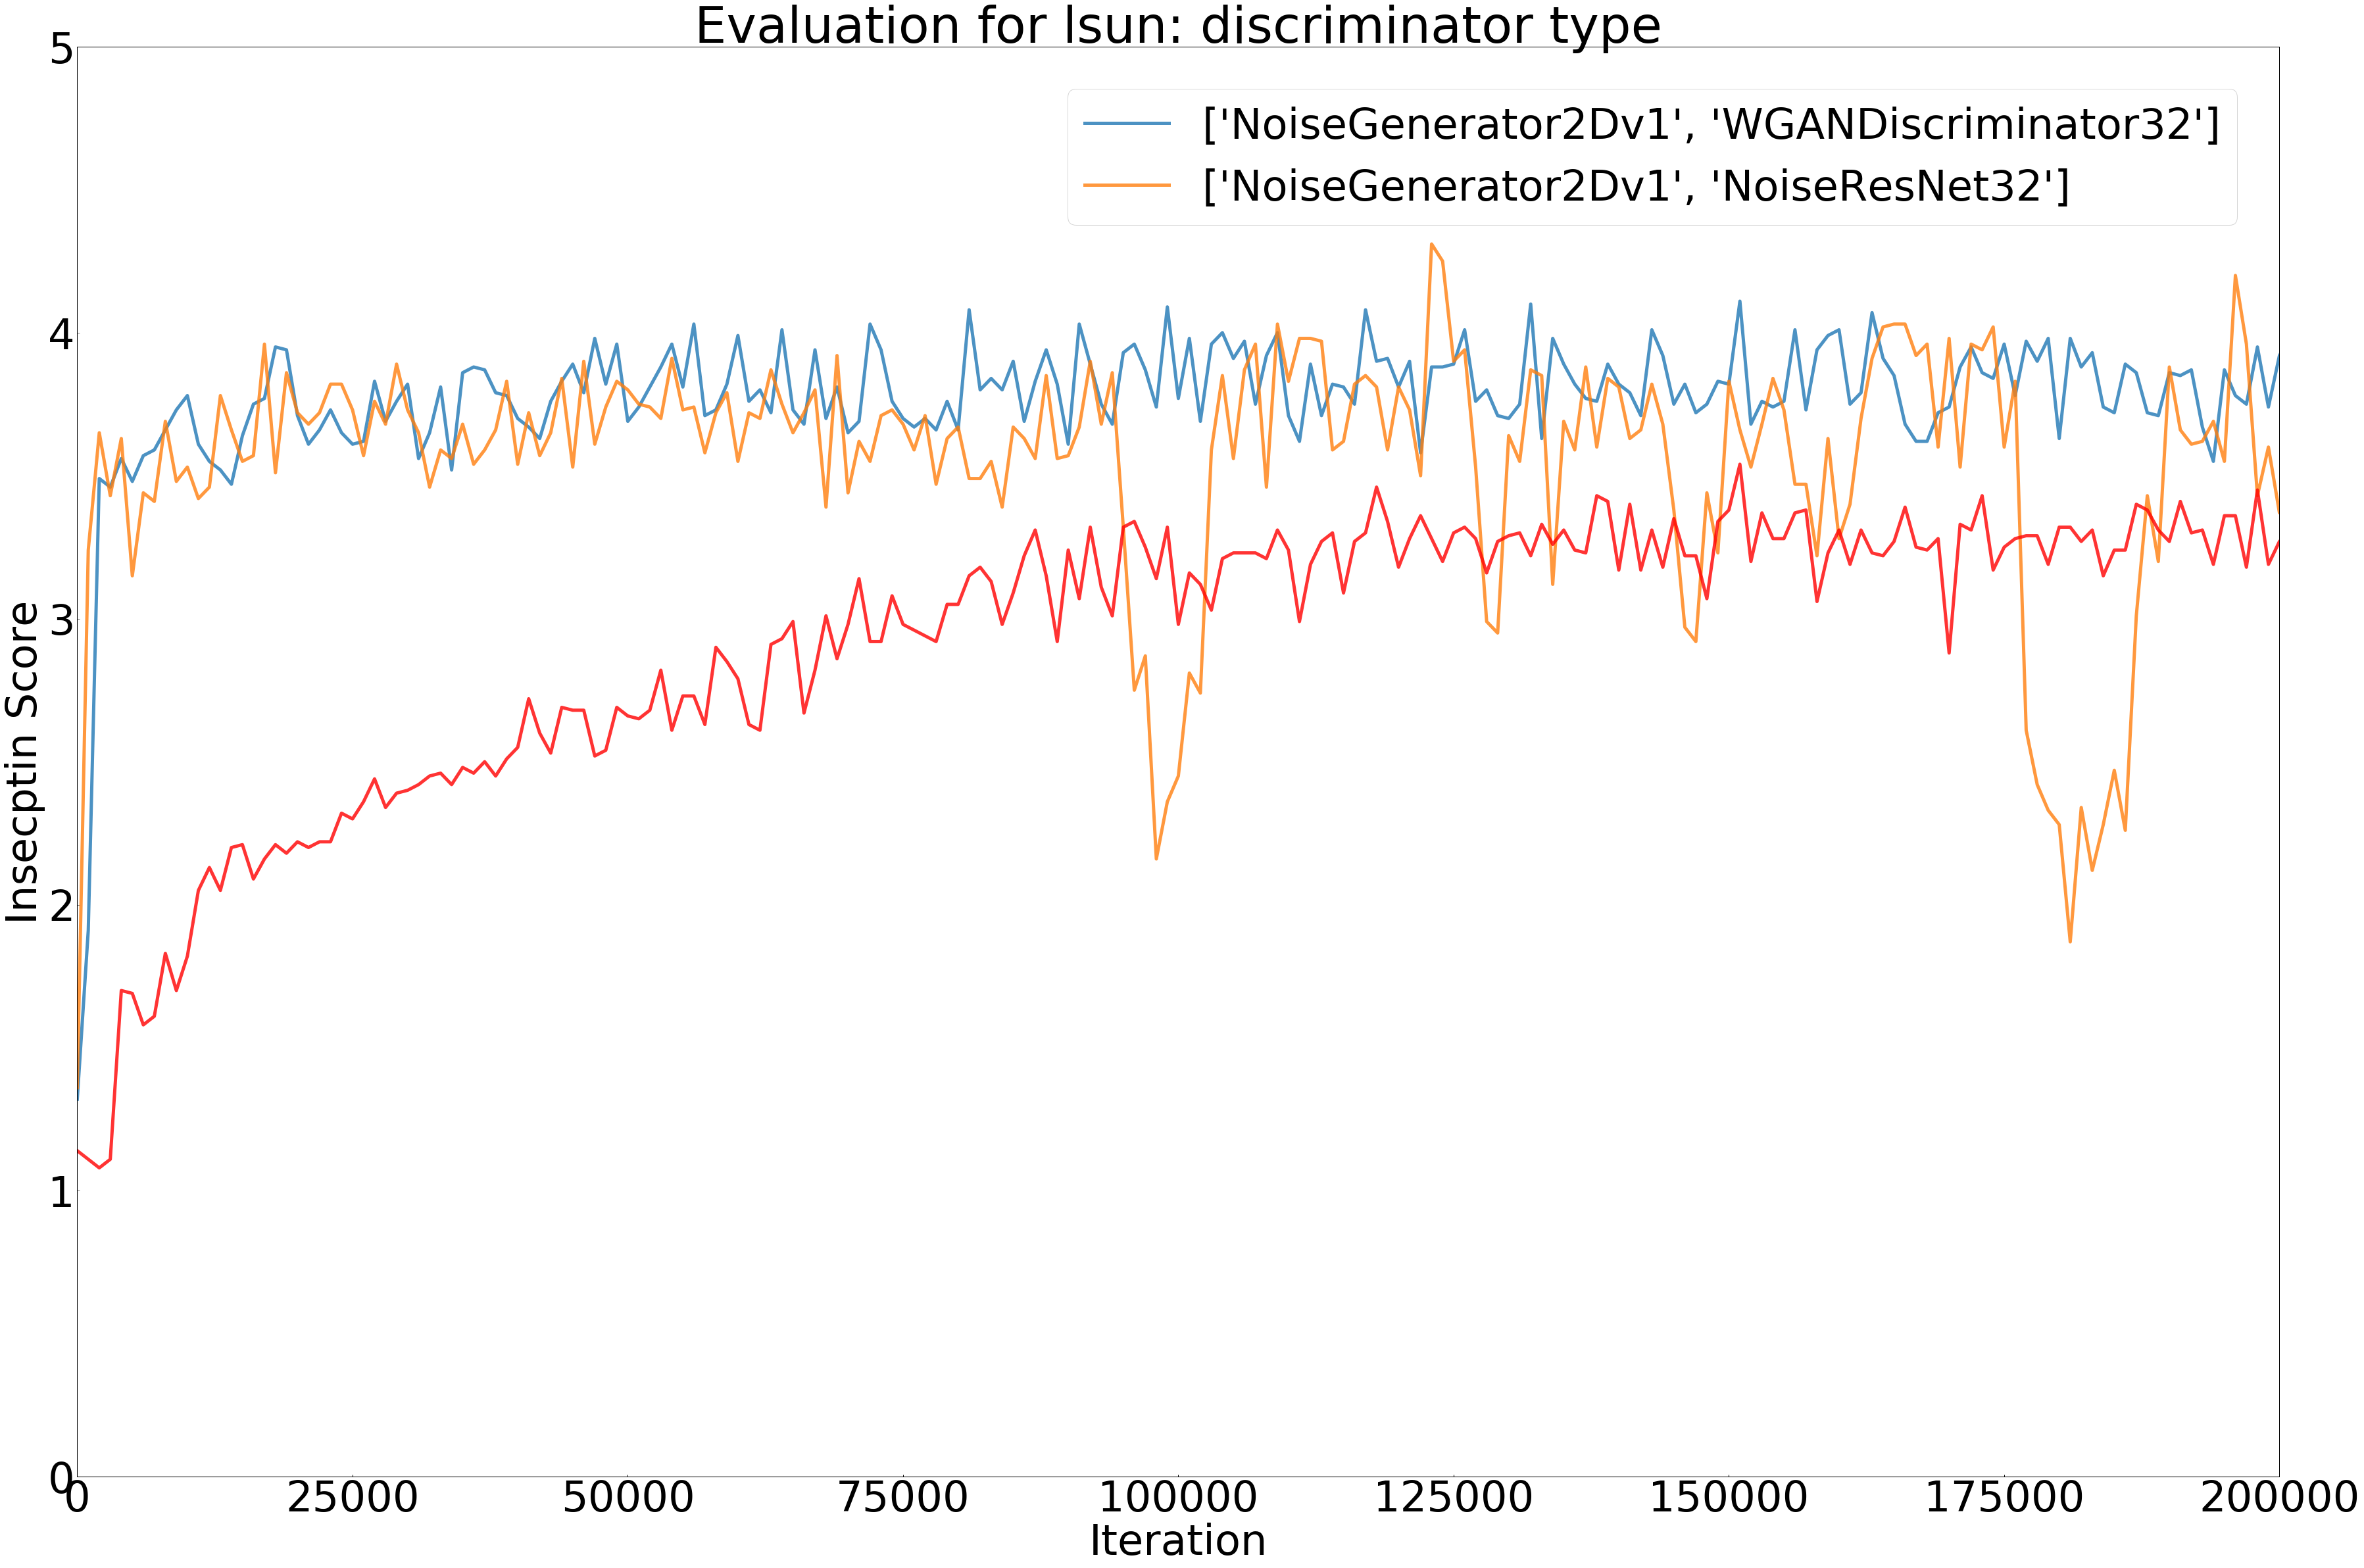

In [66]:
eval_files_dir = './evalIS/lsun/discriminator'
plotISperIter(eval_files_dir, ylim=5, xlim=200000)

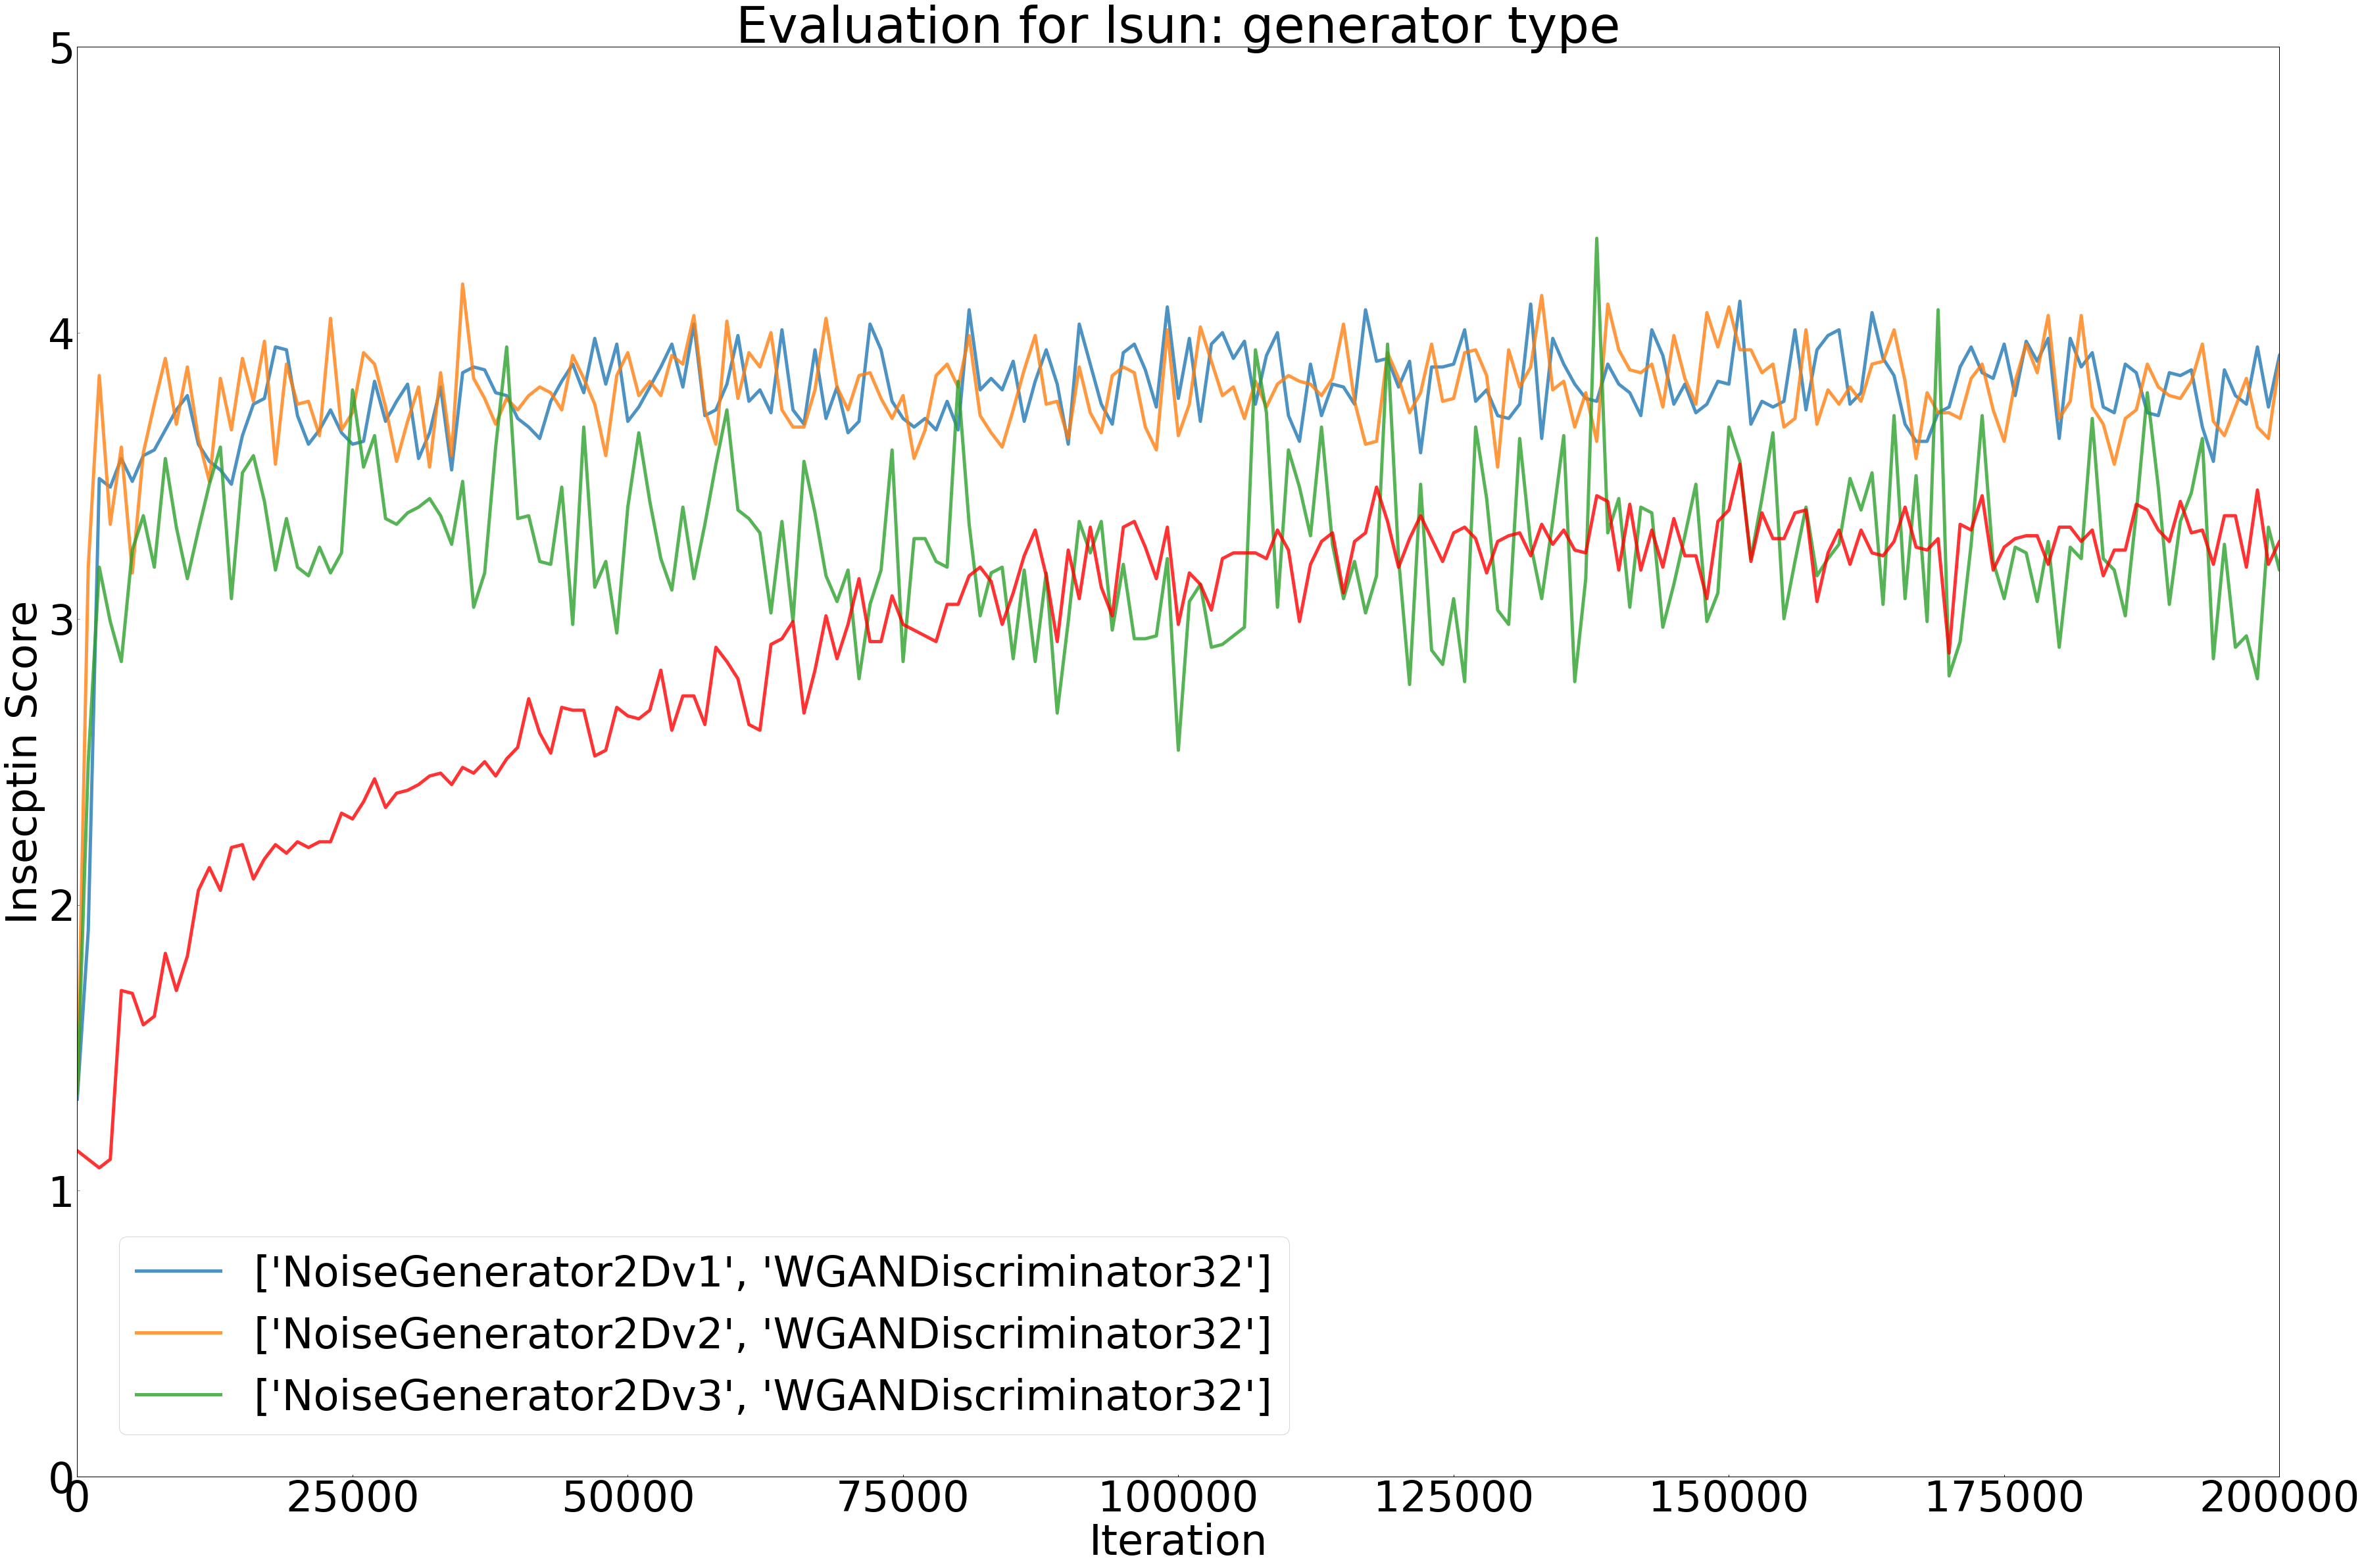

In [67]:
eval_files_dir = './evalIS/lsun/generator'
plotISperIter(eval_files_dir, ylim=5, xlim=200000)

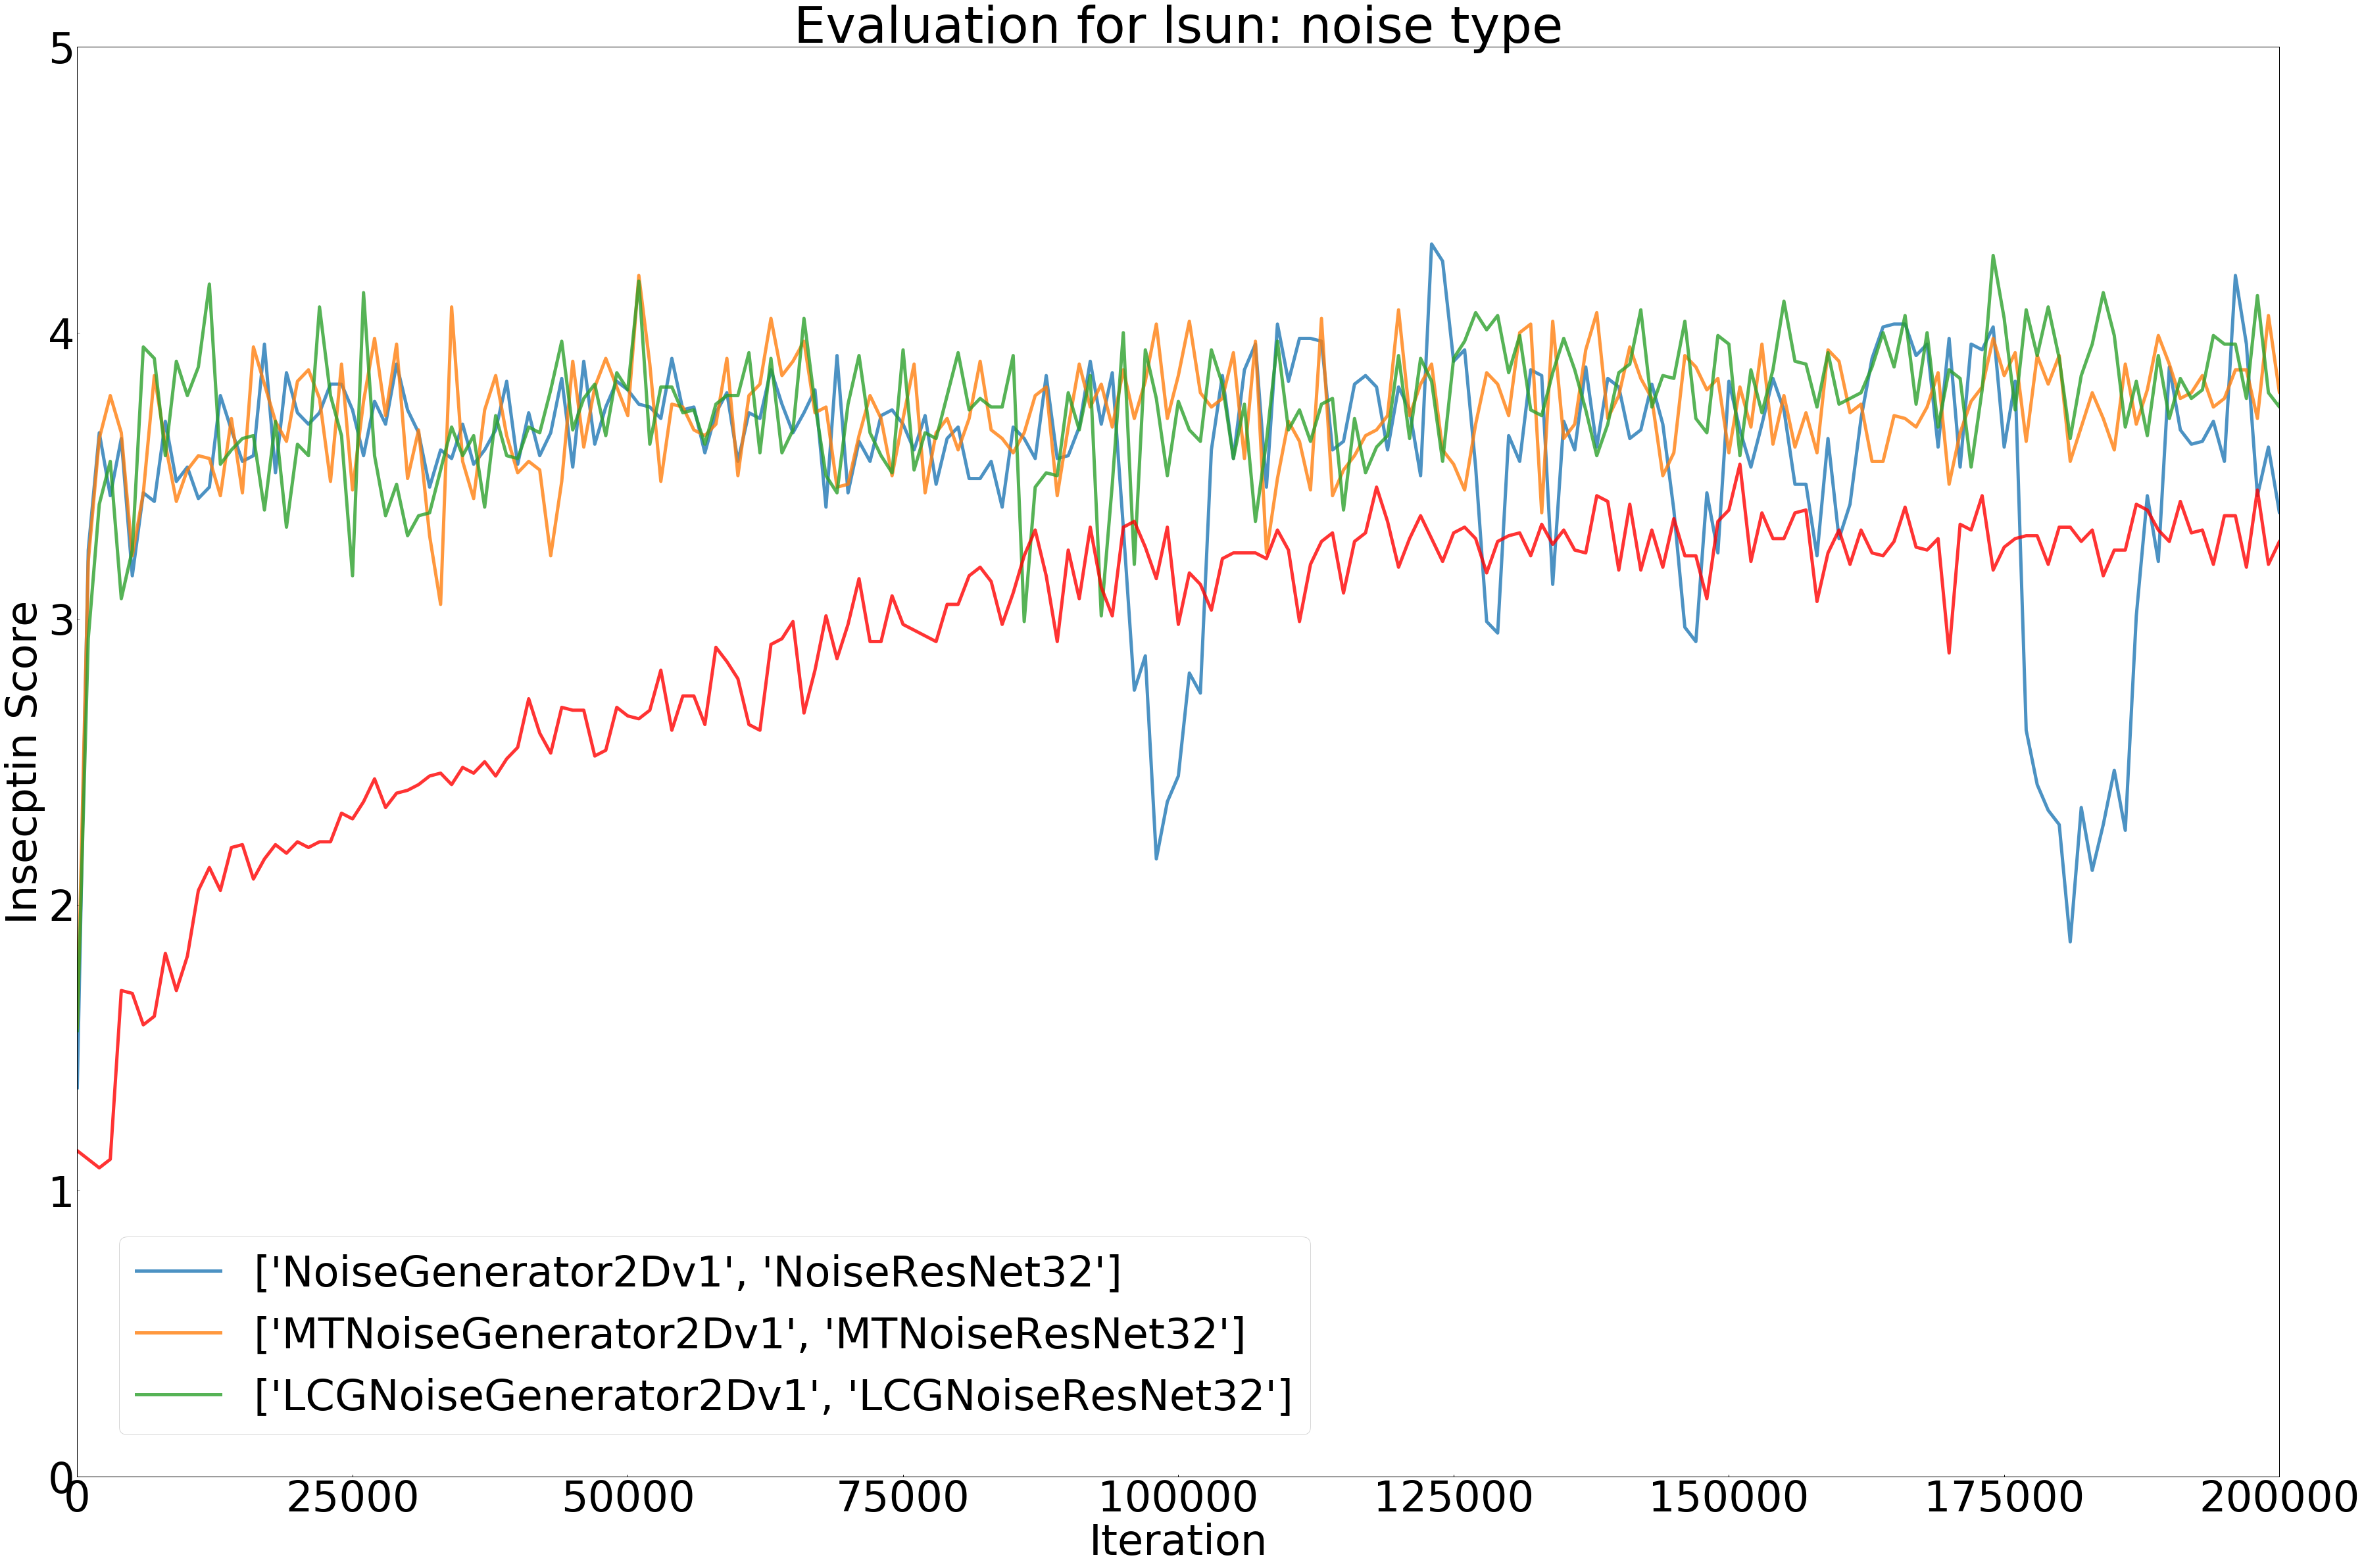

In [68]:
eval_files_dir = './evalIS/lsun/noise'
plotISperIter(eval_files_dir, ylim=5, xlim=200000)

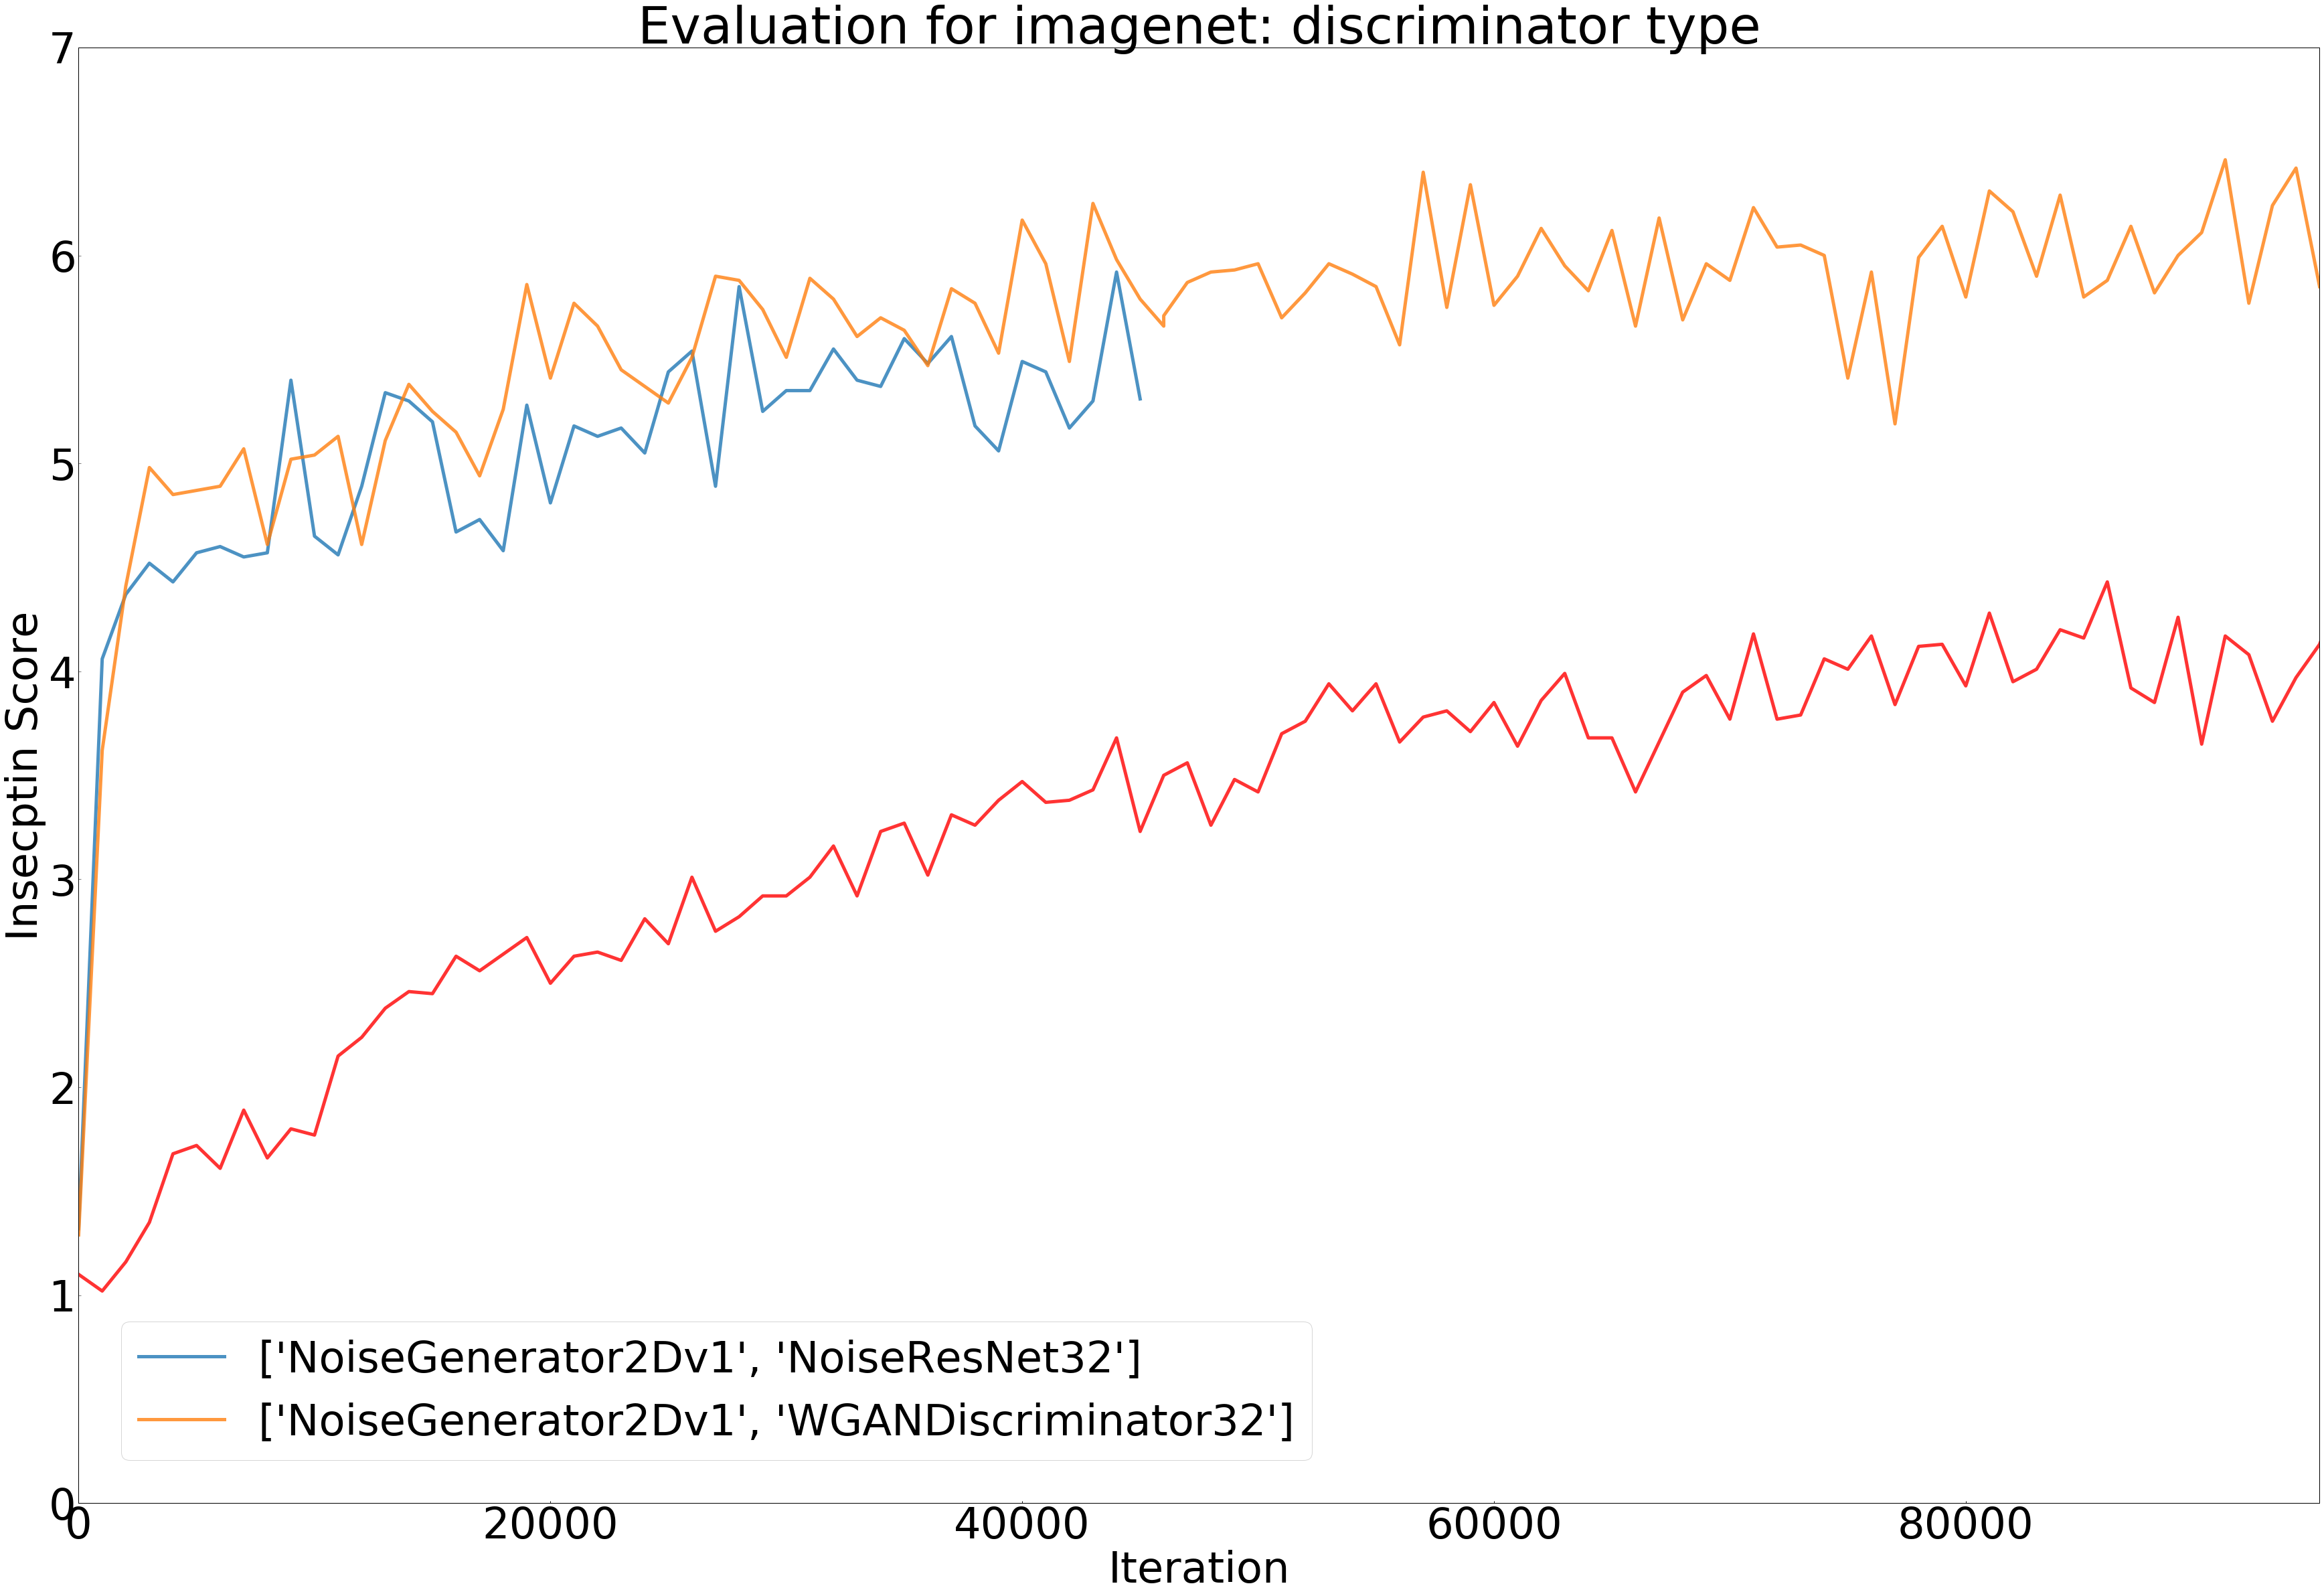

In [76]:
eval_files_dir = './evalIS/imagenet/discriminator'
plotISperIter(eval_files_dir, ylim=7, xlim=95000)

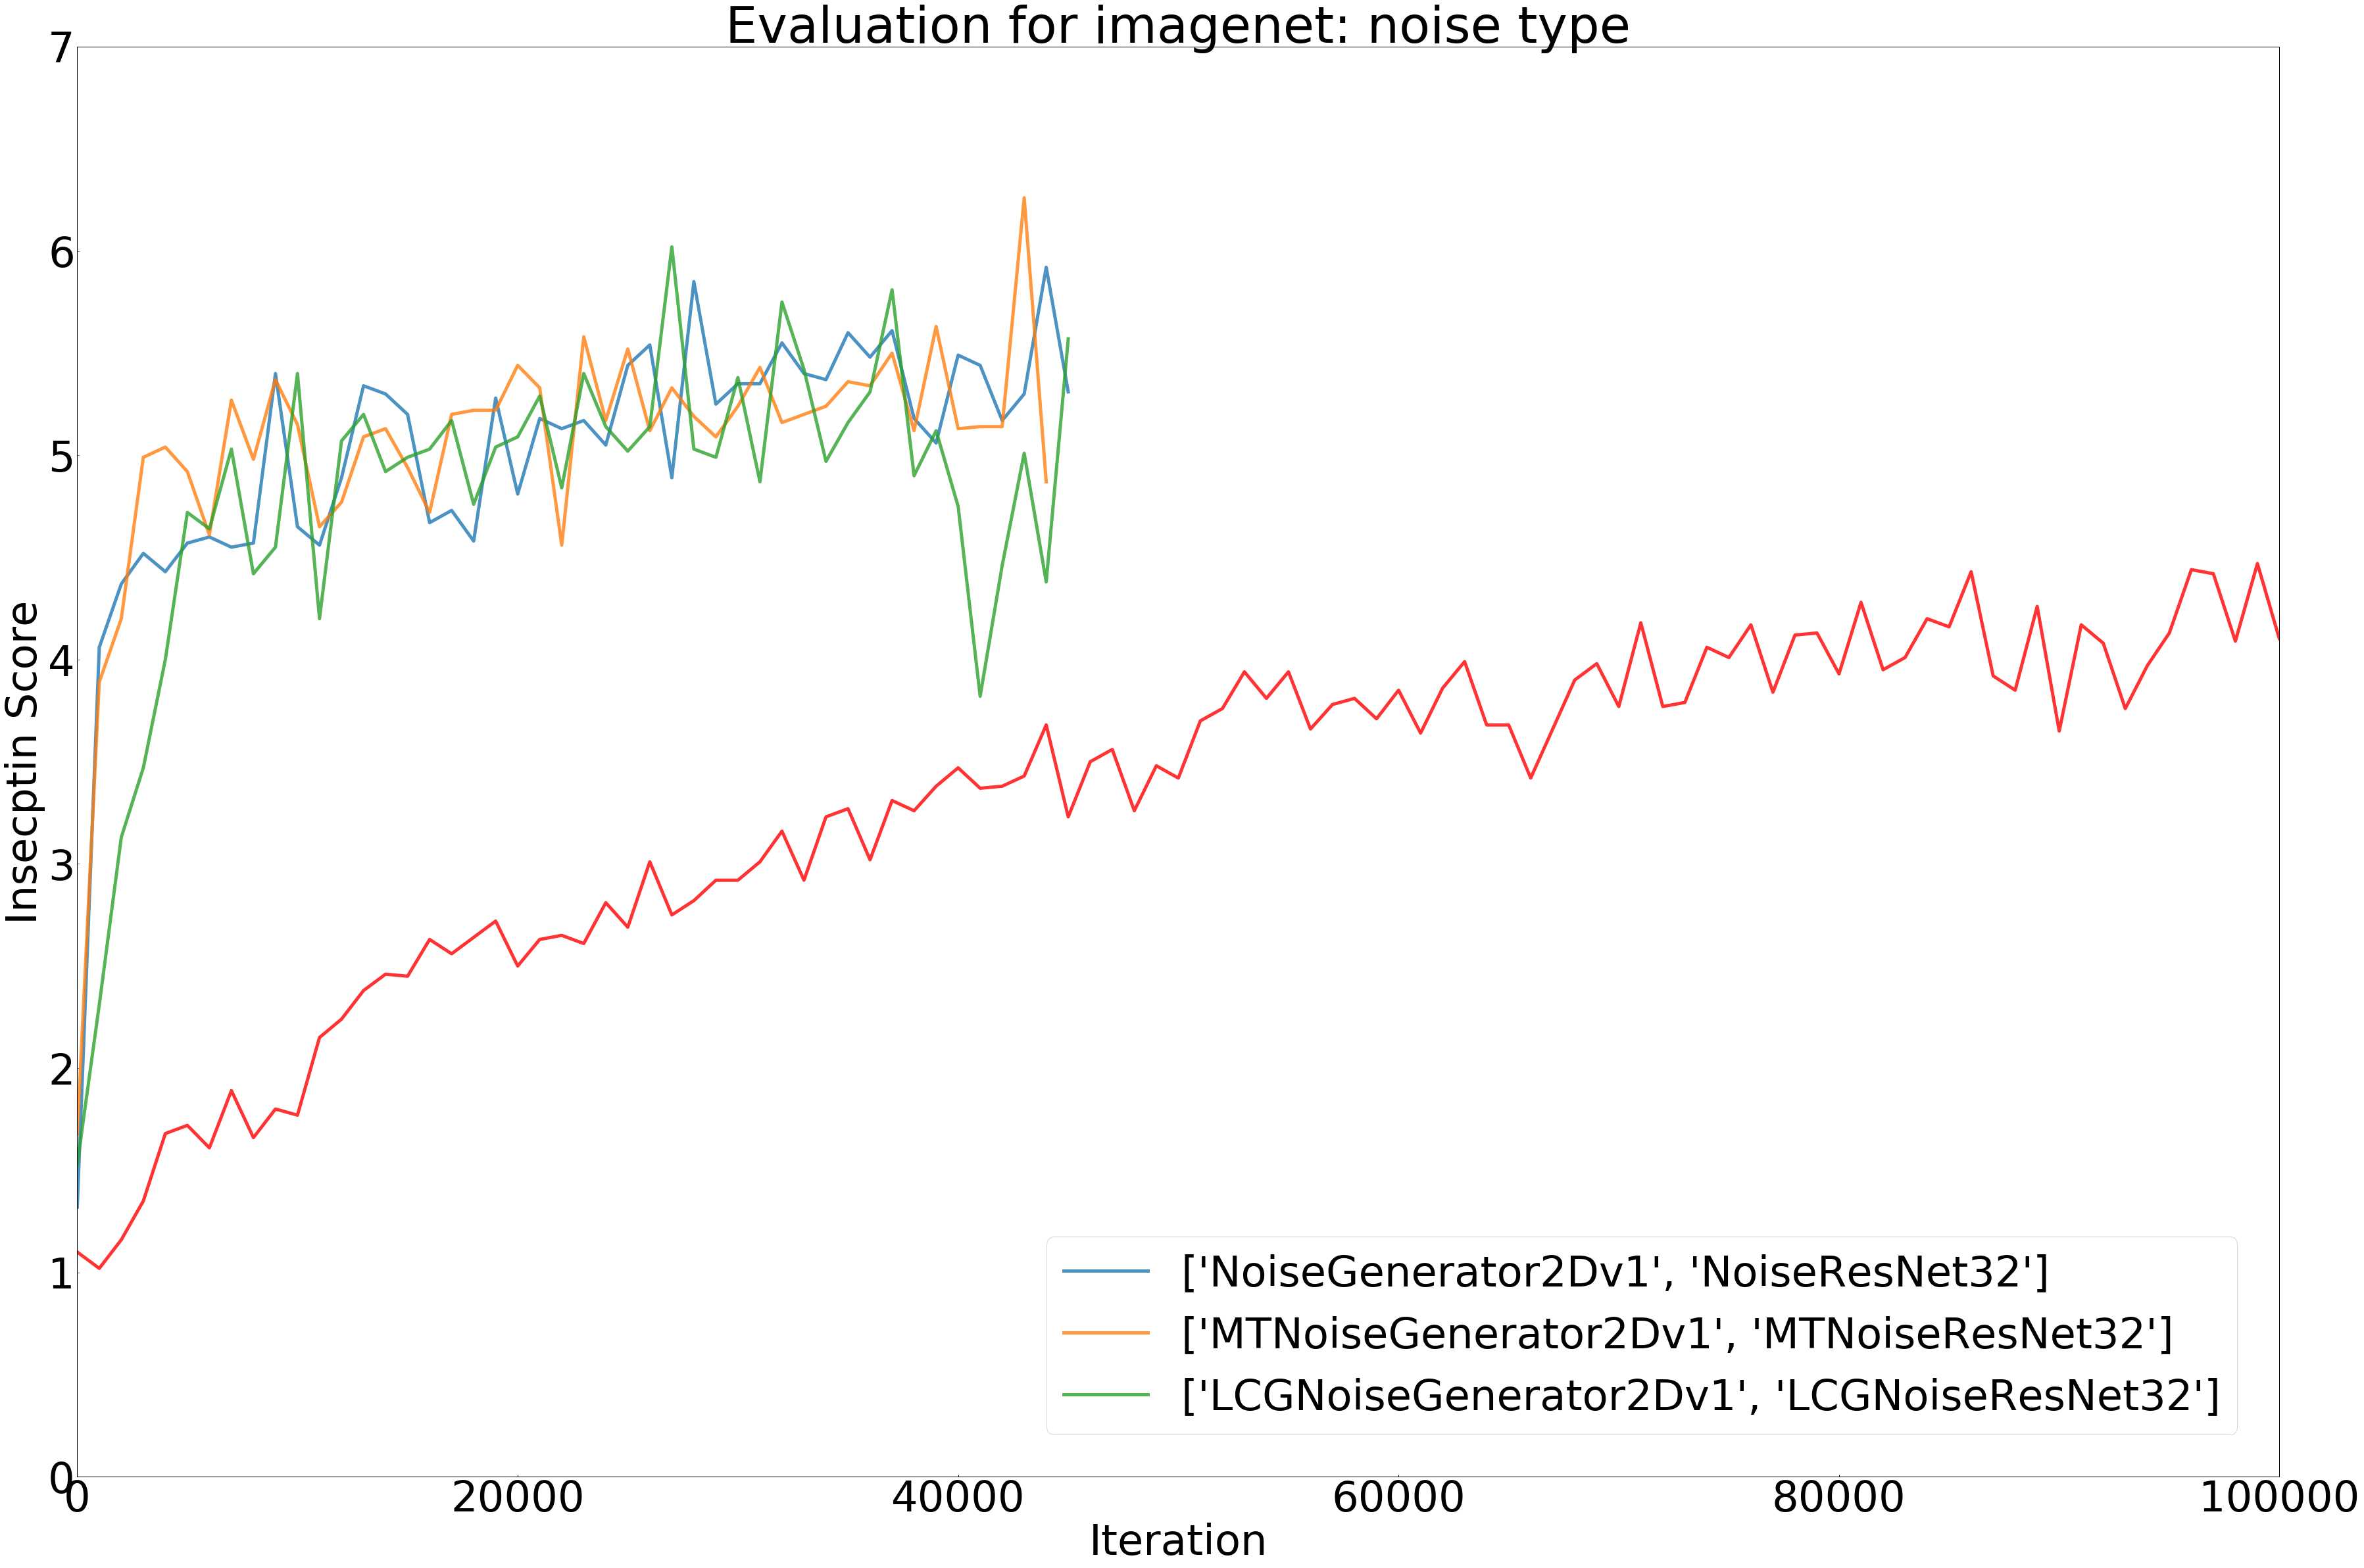

In [70]:
eval_files_dir = './evalIS/imagenet/noise'
plotISperIter(eval_files_dir, ylim=7, xlim=100000)